In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
!head 210728*

name,sequence,k_T_1,A_T_1,rms_T_1,k_C_1,A_C_1,rms_C_1,aa_seq
r10_24_TrROS,TCTGCGGGCGGTTCCGCGGGTGGTTCTGCTGGTGGTGTTCTGGAAGAAATCGCGGACAAAGCGCGTAAAGCGGGTTACAAAGTTAAAATCGAAGTTCAGCCGATGCGTGTTAAAGGTCCGGATGGTAAACCGCGCGAAATCCCGATGCTGACCATTGTTTCTCCAGACCAACCGCCGTCCGCTGGCGGCTCCGCGGGTGGTTCTGCTGGTGGCTCT,-2.8766977788465917,1.1367882821213395,0.7574831221385818,-3.1552694496141678,1.2760043731056063,0.657773807777948,VLEEIADKARKAGYKVKIEVQPMRVKGPDGKPREIPMLTIVSPDQPP
r17_271_TrMRF,TCTGCGGGTGGTTCCGCTGGCGGTTCTGCGGGTAAACTGCCGATCAAATCTATCTCTTACGACCCGTCTACCGGCAAACTGTACCTCTACATCGACTCTACCGACTACGTGATCGAGATTGACCTCAAGACCCTGAAAATCAAGAAGATCTACAAGGTGGGCTCTAAGTACGCGAAGAAATCCGCGGGTGGCTCCGCTGGCGGCTCTGCTGGTGGT,-3.2388150138526464,0.9647340544441402,0.417418883222334,-3.371847243644208,1.2215310221259694,0.5413335379102122,KLPIKSISYDPSTGKLYLYIDSTDYVIEIDLKTLKIKKIYKVGSKYAKK
r4_447_TrMRF,TCTGCGGGCGGTTCCGCTGGTGGCTCCGCGGGTGGTTCTGTTGCGTACGTTGCGCCGGACGGTGACAAACTGATCGTTCGCGTTGTTCGCCCAGACGGCTCCGTTGAGGAAAAAGAATTCGACTCTCTGGAAGACCTG

In [2]:
!head raw.txt

r3_181_TrROS_Hall 82.92511765625845 4.833818 7.5683265 -0.08614706425800718 -0.8269202678897603
r1_481_TrROS_Hall 62.584579193310276 8.357224 16.30743 0.9816647268324216 -0.21903482541667685
r6_606_TrROS 59.16135367715809 13.274248 15.081867 -10.0 -10.0
r9_599_TrMRF 52.447423663264026 10.275406 26.645353 -1.6265766924110814 -1.7844455103372658
r16_550_TrROS 70.1057995361674 9.497614 10.844904 -1.1029654448720263 -0.6440295113082166
r15_45_TrMRF 65.12627599985304 8.257766 27.258224 -1.236436371185358 -2.1026832071624173
r5_752_TrROS 69.93547360613921 7.572384 14.09837 -0.9751718174136592 -2.165653486279586
r19_46_TrROS_Hall 74.74507042451584 6.5354843 29.274744 0.3211141896744553 0.31924908233307536
r16_714_JUSTAS 71.10338923560982 8.129498 13.686664 0.34588905833276185 -2.235394958111636
r5_20_TrMRF 82.56634993182682 4.820916 28.844713 0.8027565068927951 -0.10752092625555568


## 1. Filtered based on plddt and inter-PAE

In [63]:
import csv


methods = {"TrROS": {}, "TrMRF": {}, "TrROS_Hall": {}, "JUSTAS": {}}

with open("dataset_final/all_4.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Skip the header

    for row in reader:
        name, sequence, Full_PLDDT, half_masked_PLDDT, max_PLDDT, avg_PLDDT, esm_score, AF_plddt, inter_pae, k_T_1, k_T_95CI, k_C_1, k_C_95CI, deltaG_t, deltaG_t_95CI, deltaG_c, deltaG_c_95CI, deltaG, deltaG_95CI ,unconditional_CE, conditional_CE, Hybrid_composite_score= row 
        tmp = name.split("_")
        ID, method = "_".join(tmp[:2]), "_".join(tmp[2:])
        
        if method in methods:  # Check if the method exists in the dictionary

            methods[method][ID] = {
                "k_T": float(k_T_1),
                "k_C": float(k_C_1),
                "deltaG_t": float(deltaG_t),
                "deltaG_c": float(deltaG_c),
                "deltaG": float(deltaG),
                "plddt": float(AF_plddt),
                "inter_pae": float(inter_pae),
                "Hybrid_composite_score": float(Hybrid_composite_score),
                  
            }

In [64]:
shared = {}
for method in ["TrROS","TrMRF","TrROS_Hall","JUSTAS"]: #methods.keys():
  for ID in methods[method].keys():
    if ID in shared: shared[ID] += 1
    else: shared[ID] = 1

In [65]:
_TrROS_TrMRF = []
_TrMRF = []
_TrROS = []
_MPNN = []
_NAME = []
for ID,num in shared.items():
  # if ID == "r11_340":
  #   print("TrROS",methods["TrROS"][ID])
  #   print("TrMRF",methods["TrMRF"][ID])
  #   print("TrROS_TrMRF",methods["TrROS_Hall"][ID])
  #   print("JUSTAS", methods["JUSTAS"][ID])
  if num == 4:
    if methods["TrROS"][ID]["plddt"] > 70 \
    and methods["TrMRF"][ID]["plddt"] > 70 \
    and methods["TrROS_Hall"][ID]["plddt"] > 70 \
    and methods["JUSTAS"][ID]["plddt"] > 70 \
    \
    and methods["TrROS"][ID]["inter_pae"] > 15.0 \
    and methods["TrMRF"][ID]["inter_pae"] > 15.0 \
    and methods["TrROS_Hall"][ID]["inter_pae"] > 15.0 \
    and methods["JUSTAS"][ID]["inter_pae"] > 15.0:

      _TrROS_TrMRF.append([methods["TrROS_Hall"][ID]["k_T"],
                           methods["TrROS_Hall"][ID]["k_C"],
                           methods["TrROS_Hall"][ID]["deltaG_t"],
                           methods["TrROS_Hall"][ID]["deltaG_c"],
                           methods["TrROS_Hall"][ID]["deltaG"],
                           methods["TrROS_Hall"][ID]["Hybrid_composite_score"],
                           methods["TrROS_Hall"][ID]["inter_pae"],
                           methods["TrROS_Hall"][ID]["plddt"]])
      _TrMRF.append([methods["TrMRF"][ID]["k_T"],
                     methods["TrMRF"][ID]["k_C"],
                     methods["TrMRF"][ID]["deltaG_t"],
                     methods["TrMRF"][ID]["deltaG_c"],
                     methods["TrMRF"][ID]["deltaG"],
                     methods["TrMRF"][ID]["Hybrid_composite_score"],
                     methods["TrMRF"][ID]["inter_pae"],
                     methods["TrMRF"][ID]["plddt"]])
      _TrROS.append([methods["TrROS"][ID]["k_T"],
                     methods["TrROS"][ID]["k_C"],
                     methods["TrROS"][ID]["deltaG_t"],
                     methods["TrROS"][ID]["deltaG_c"],
                     methods["TrROS"][ID]["deltaG"],
                     methods["TrROS"][ID]["Hybrid_composite_score"],
                     methods["TrROS"][ID]["inter_pae"],
                     methods["TrROS"][ID]["plddt"]])
      _MPNN.append([methods["JUSTAS"][ID]["k_T"],
                     methods["JUSTAS"][ID]["k_C"],
                     methods["JUSTAS"][ID]["deltaG_t"],
                     methods["JUSTAS"][ID]["deltaG_c"],
                     methods["JUSTAS"][ID]["deltaG"],
                     methods["JUSTAS"][ID]["Hybrid_composite_score"],
                     methods["JUSTAS"][ID]["inter_pae"],
                     methods["JUSTAS"][ID]["plddt"]])
      _NAME.append(ID)

_TrROS_TrMRF = np.array(_TrROS_TrMRF)
_TrMRF = np.array(_TrMRF)
_TrROS = np.array(_TrROS)
_MPNN = np.array(_MPNN)

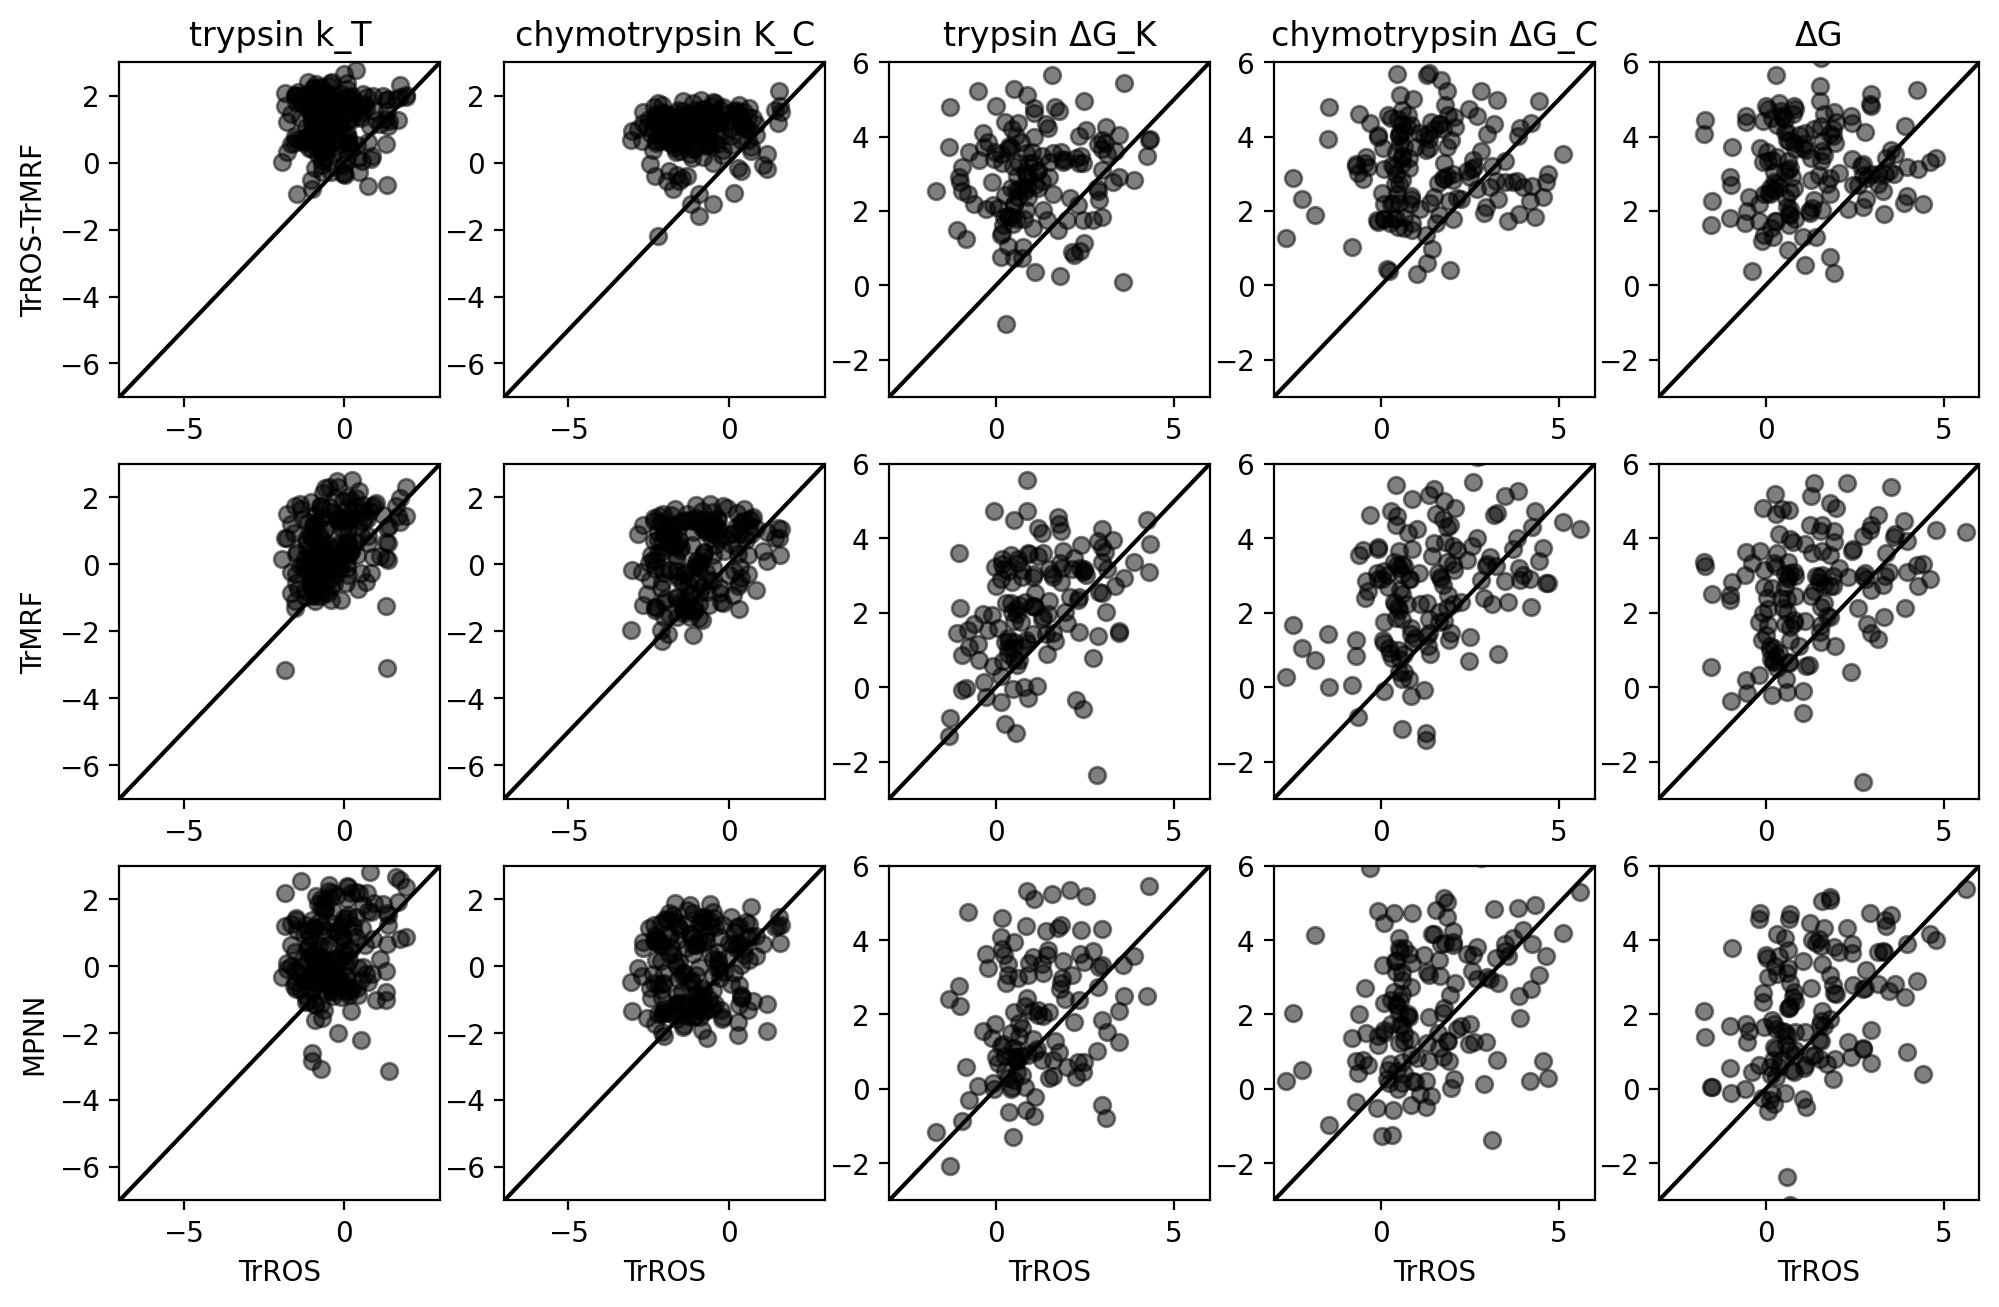

In [66]:
plt.figure(figsize=(12,10),dpi=200)

plt.subplot(4,5,1)
plt.title("trypsin k_T")
plt.scatter(_TrROS[:,0],_TrROS_TrMRF[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrROS-TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,2)
plt.title("chymotrypsin K_C")
plt.scatter(_TrROS[:,1],_TrROS_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,3)
plt.title("trypsin ΔG_K")
plt.scatter(_TrROS[:,2],_TrROS_TrMRF[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,4)
plt.title("chymotrypsin ΔG_C")
plt.scatter(_TrROS[:,3],_TrROS_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,5)
plt.title("ΔG")
plt.scatter(_TrROS[:,4],_TrROS_TrMRF[:,4], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")


plt.subplot(4,5,6)
plt.scatter(_TrROS[:,0],_TrMRF[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,7)
plt.scatter(_TrROS[:,1],_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,8)
plt.scatter(_TrROS[:,2],_TrMRF[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,9)
plt.scatter(_TrROS[:,3],_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,10)
plt.scatter(_TrROS[:,4],_TrMRF[:,4], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")


plt.subplot(4,5,11)
plt.scatter(_TrROS[:,0],_MPNN[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("TrROS");plt.ylabel("MPNN");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,12)
plt.scatter(_TrROS[:,1],_MPNN[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("TrROS");plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,13)
plt.scatter(_TrROS[:,2],_MPNN[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS");plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,14)
plt.scatter(_TrROS[:,3],_MPNN[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS");plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,15)
plt.scatter(_TrROS[:,4],_MPNN[:,4], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS");plt.plot([-3,6],[-3,6],color="black")


# plt.savefig('figures/4seqs_plddt07_interpae015/TRros_vs_others_experiment_evaluation.png', dpi =300)
plt.show()

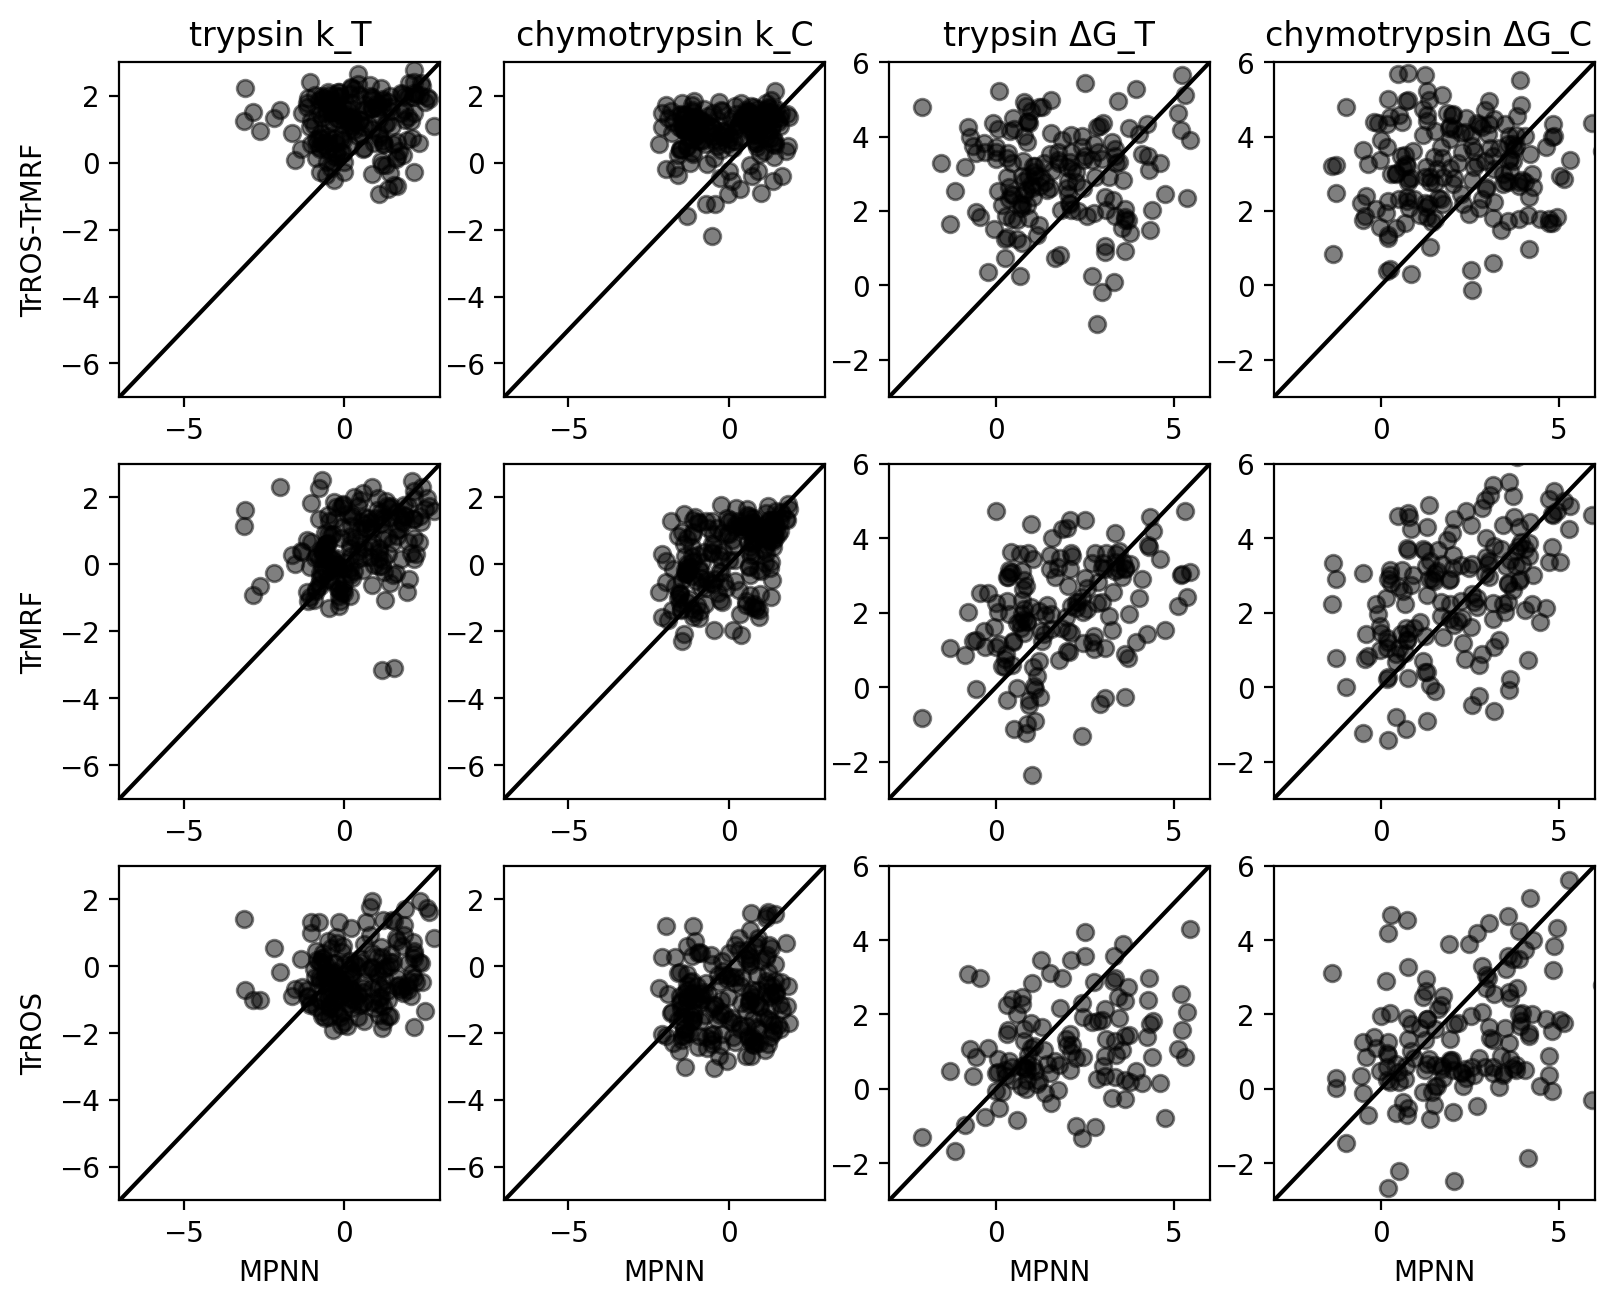

In [79]:
plt.figure(figsize=(12,10),dpi=200)

plt.subplot(4,5,1)
plt.title("trypsin k_T")
plt.scatter(_MPNN[:,0],_TrROS_TrMRF[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrROS-TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,2)
plt.title("chymotrypsin k_C")
plt.scatter(_MPNN[:,1],_TrROS_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,3)
plt.title("trypsin ΔG_T")
plt.scatter(_MPNN[:,2],_TrROS_TrMRF[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,4)
plt.title("chymotrypsin ΔG_C ")
plt.scatter(_MPNN[:,3],_TrROS_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,5)
# plt.title("Hybrid \ncomposite_score")
# plt.scatter(_MPNN[:,7],_TrROS_TrMRF[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")

plt.subplot(4,5,6)
plt.scatter(_MPNN[:,0],_TrMRF[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,7)
plt.scatter(_MPNN[:,1],_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,8)
plt.scatter(_MPNN[:,2],_TrMRF[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,9)
plt.scatter(_MPNN[:,3],_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,10)
# plt.scatter(_MPNN[:,7],_TrMRF[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")

plt.subplot(4,5,11)
plt.scatter(_MPNN[:,0],_TrROS[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("MPNN");plt.ylabel("TrROS");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,12)
plt.scatter(_MPNN[:,1],_TrROS[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("MPNN");plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,13)
plt.scatter(_MPNN[:,2],_TrROS[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("MPNN");plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,14)
plt.scatter(_MPNN[:,3],_TrROS[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("MPNN");plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,15)
# plt.scatter(_MPNN[:,7],_TrROS[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")

# plt.savefig('figures/4seqs_plddt07_interpae015/MPNN_vs_others_experiment_evaluation.png', dpi =300)

plt.show()

/state/partition1/slurm_tmp/24756012.0.0/ipykernel_4040819/1800306847.py:81: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('figures/4seqs_plddt07_interpae015/joint_model_vs_others_experiment_evaluation.png', dpi =300)


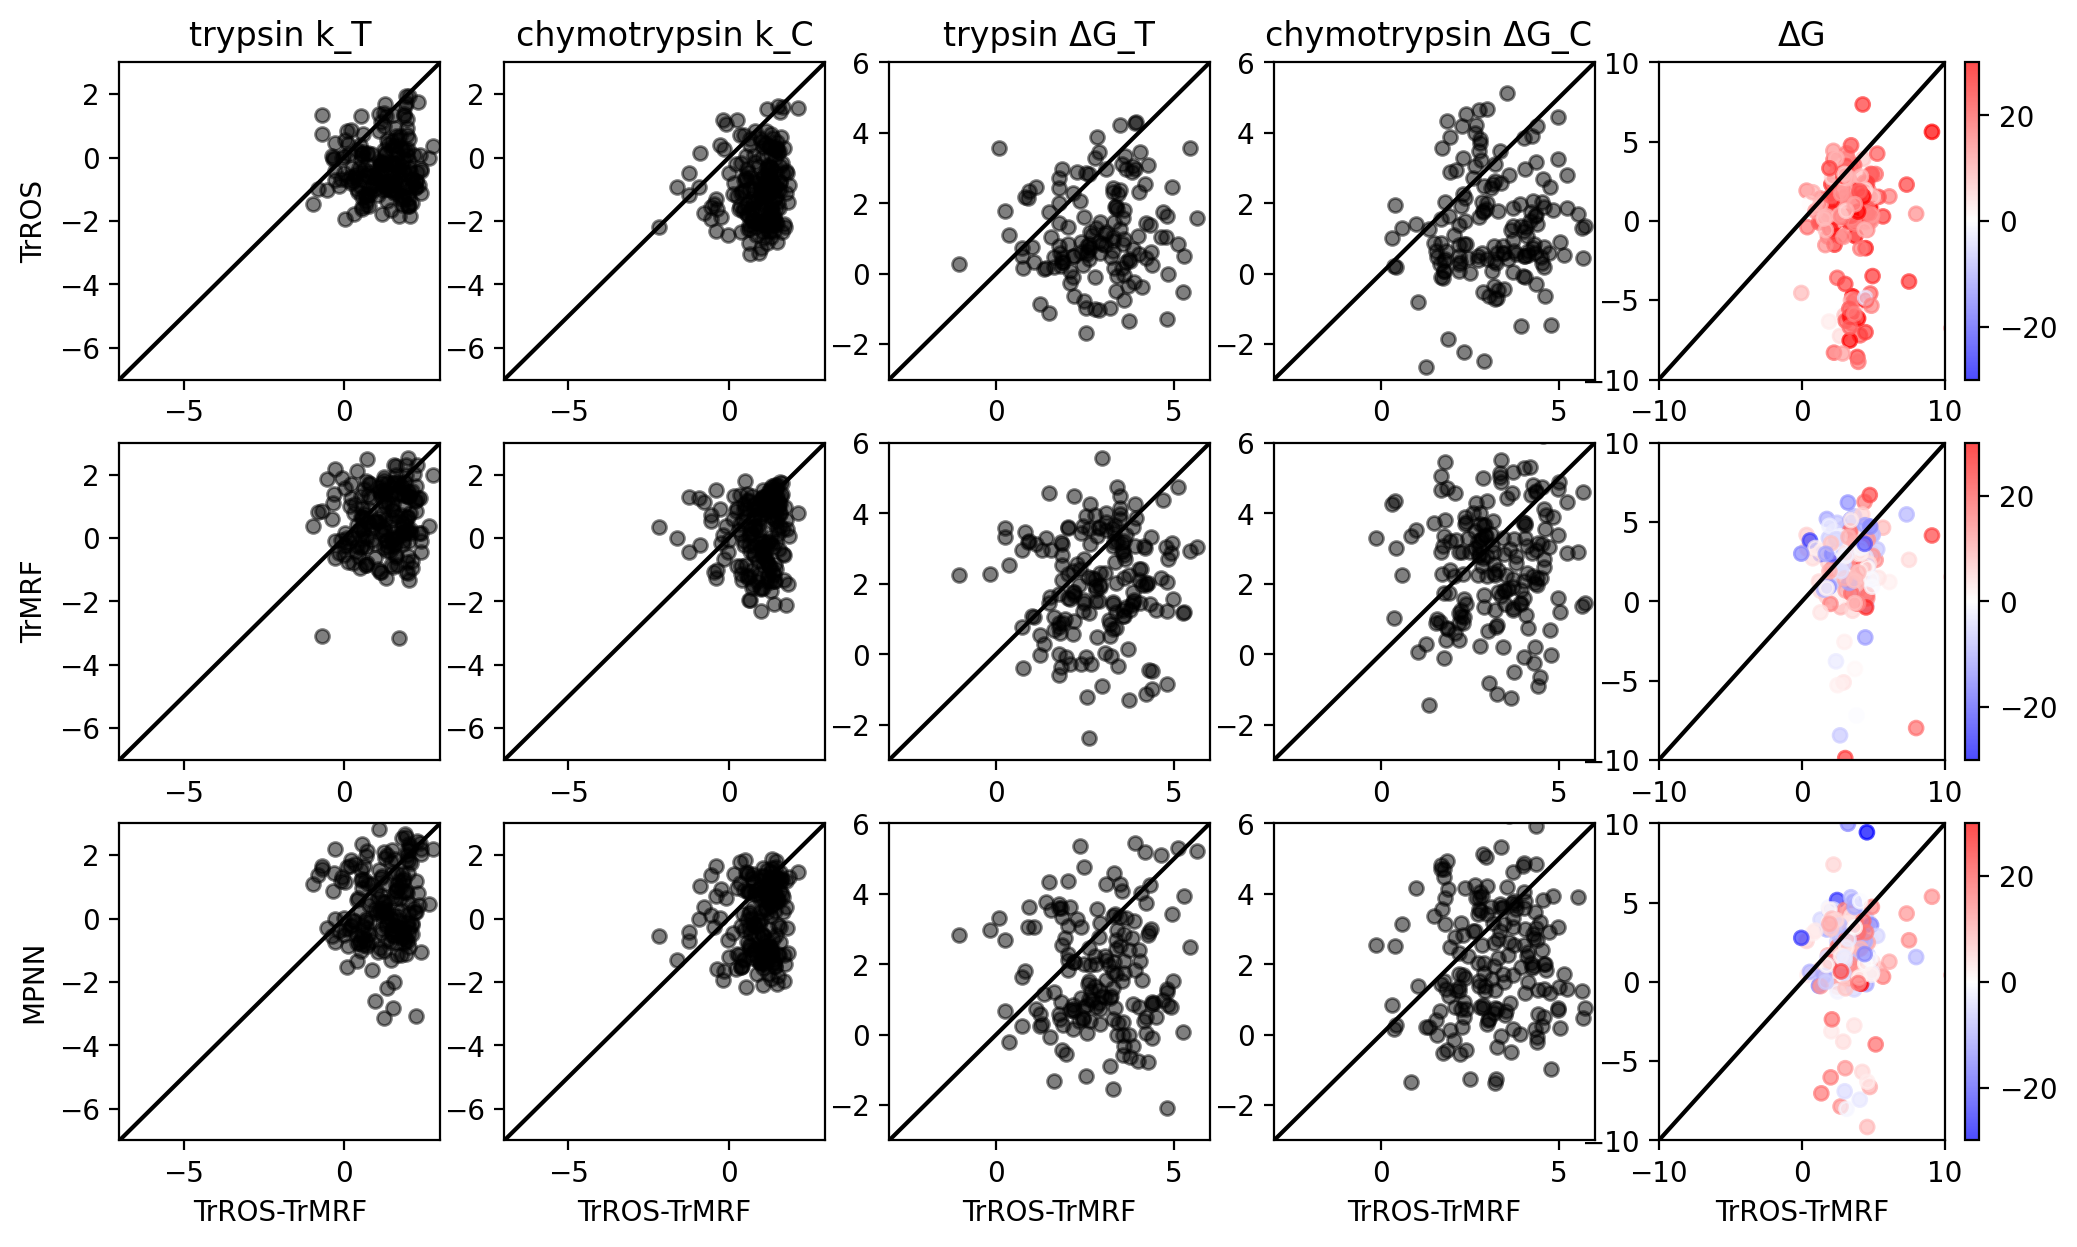

In [67]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 5, figsize=(12, 7), dpi=200, constrained_layout={'w_pad': 2, 'h_pad': 2})

plt.subplot(3,5,1)
plt.title("trypsin k_T")
plt.scatter(_TrROS_TrMRF[:,0],_TrROS[:,0], color="black", alpha=0.5, s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrROS");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,2)
plt.title("chymotrypsin k_C")
plt.scatter(_TrROS_TrMRF[:,1],_TrROS[:,1], color="black", alpha=0.5, s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,3)
plt.title("trypsin ΔG_T")
plt.scatter(_TrROS_TrMRF[:,2],_TrROS[:,2], color="black", alpha=0.5, s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,5,4)
plt.title("chymotrypsin ΔG_C ")
plt.scatter(_TrROS_TrMRF[:,3],_TrROS[:,3], color="black", alpha=0.5, s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
last_subplot = plt.subplot(3,5,5)
plt.title("ΔG")
divider = make_axes_locatable(last_subplot)
cax = divider.append_axes("right", size="5%", pad=0.1)
scatter = last_subplot.scatter(_TrROS_TrMRF[:, 4], _TrROS[:, 4], c=_TrROS_TrMRF[:, 5] - _TrROS[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
last_subplot.set_xlim(-10, 10)
last_subplot.set_ylim(-10, 10)
last_subplot.plot([-10, 10], [-10, 10], color="black")
cbar = plt.colorbar(scatter, cax=cax)


plt.subplot(3,5,6)
plt.scatter(_TrROS_TrMRF[:,0],_TrMRF[:,0], color="black", alpha=0.5, s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,7)
plt.scatter(_TrROS_TrMRF[:,1],_TrMRF[:,1], color="black", alpha=0.5,s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

plt.subplot(3,5,8)
plt.scatter(_TrROS_TrMRF[:,2],_TrMRF[:,2], color="black", alpha=0.5,s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,5,9)
plt.scatter(_TrROS_TrMRF[:,3],_TrMRF[:,3], color="black", alpha=0.5,s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
last_subplot = plt.subplot(3,5,10)
divider = make_axes_locatable(last_subplot)
cax = divider.append_axes("right", size="5%", pad=0.1)
scatter= last_subplot.scatter(_TrROS_TrMRF[:, 4], _TrMRF[:, 4], c=_TrROS_TrMRF[:, 5] - _TrMRF[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
last_subplot.set_xlim(-10, 10)
last_subplot.set_ylim(-10, 10)
last_subplot.plot([-10, 10], [-10, 10], color="black")
cbar = plt.colorbar(scatter, cax=cax)


plt.subplot(3,5,11)
plt.scatter(_TrROS_TrMRF[:,0],_MPNN[:,0], color="black", alpha=0.5 ,s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("TrROS-TrMRF");plt.ylabel("MPNN");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,12)
plt.scatter(_TrROS_TrMRF[:,1],_MPNN[:,1], color="black", alpha=0.5, s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("TrROS-TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,13)
plt.scatter(_TrROS_TrMRF[:,2],_MPNN[:,2], color="black", alpha=0.5 , s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS-TrMRF");plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,5,14)
plt.scatter(_TrROS_TrMRF[:,3],_MPNN[:,3], color="black", alpha=0.5 , s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS-TrMRF");plt.plot([-3,6],[-3,6],color="black")

last_subplot = plt.subplot(3, 5, 15)
divider = make_axes_locatable(last_subplot)
cax = divider.append_axes("right", size="5%", pad=0.1)
scatter = last_subplot.scatter(_TrROS_TrMRF[:, 4], _MPNN[:, 4], c=_TrROS_TrMRF[:, 5] - _MPNN[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
last_subplot.set_xlim(-10, 10)
last_subplot.set_ylim(-10, 10)
last_subplot.plot([-10, 10], [-10, 10], color="black")
last_subplot.set_xlabel("TrROS-TrMRF")
cbar = plt.colorbar(scatter, cax=cax)


# plt.savefig('figures/4seqs_plddt07_interpae015/joint_model_vs_others_experiment_evaluation.png', dpi =300)

plt.show()

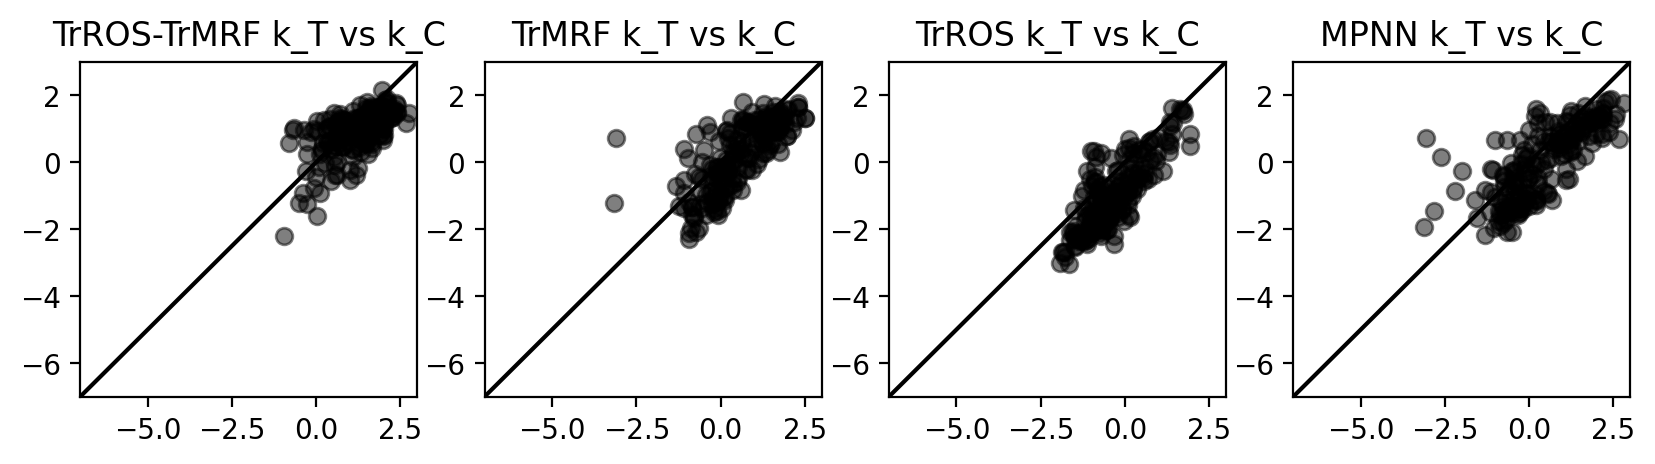

In [81]:
plt.figure(figsize=(10,10),dpi=200)

plt.subplot(4,4,1)
plt.title("TrROS-TrMRF k_T vs k_C")
plt.scatter(_TrROS_TrMRF[:,0],_TrROS_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,4,2)
plt.title("TrMRF k_T vs k_C")
plt.scatter(_TrMRF[:,0],_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,4,3)
plt.title("TrROS k_T vs k_C")
plt.scatter(_TrROS[:,0],_TrROS[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,4,4)
plt.title("MPNN k_T vs k_C")
plt.scatter(_MPNN[:,0],_MPNN[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

# plt.savefig('figures/4seqs_plddt07_interpae015/kc_vs_kt_evaluation.png', dpi= 300)

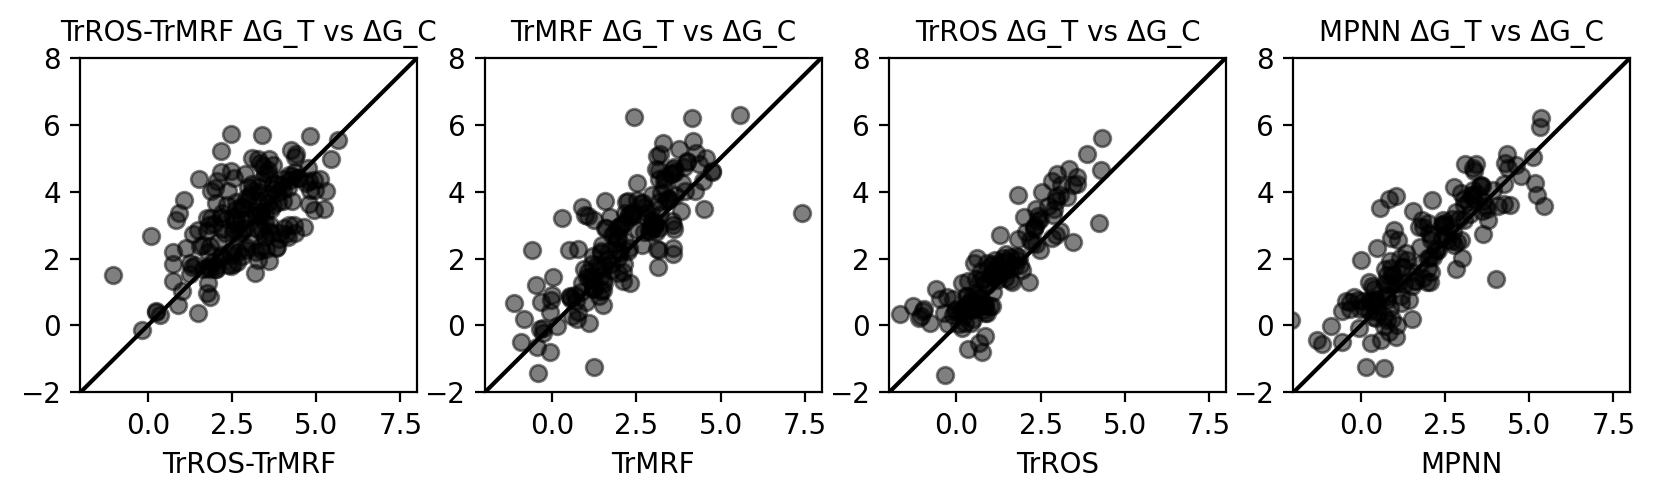

In [82]:
plt.figure(figsize=(10,10),dpi=200)

plt.subplot(4,4,1)
plt.title("TrROS-TrMRF ΔG_T vs ΔG_C", fontsize = 10)
plt.scatter(_TrROS_TrMRF[:,2],_TrROS_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("TrROS-TrMRF");plt.plot([-2,8],[-2,8],color="black")
plt.subplot(4,4,2)
plt.title("TrMRF ΔG_T vs ΔG_C", fontsize = 10)
plt.scatter(_TrMRF[:,2],_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("TrMRF");plt.plot([-2,8],[-2,8],color="black")
plt.subplot(4,4,3)
plt.title("TrROS ΔG_T vs ΔG_C", fontsize = 10)
plt.scatter(_TrROS[:,2],_TrROS[:,3], color="black", alpha=0.5)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("TrROS");plt.plot([-2,8],[-2,8],color="black")
plt.subplot(4,4,4)
plt.title("MPNN ΔG_T vs ΔG_C", fontsize = 10)
plt.scatter(_MPNN[:,2],_MPNN[:,3], color="black", alpha=0.5)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("MPNN");plt.plot([-2,8],[-2,8],color="black")

# plt.savefig('figures/4seqs_plddt07_interpae015/Gc_vs_Gt_evaluation.png', dpi=300)

In [30]:
len(_TrMRF)

186

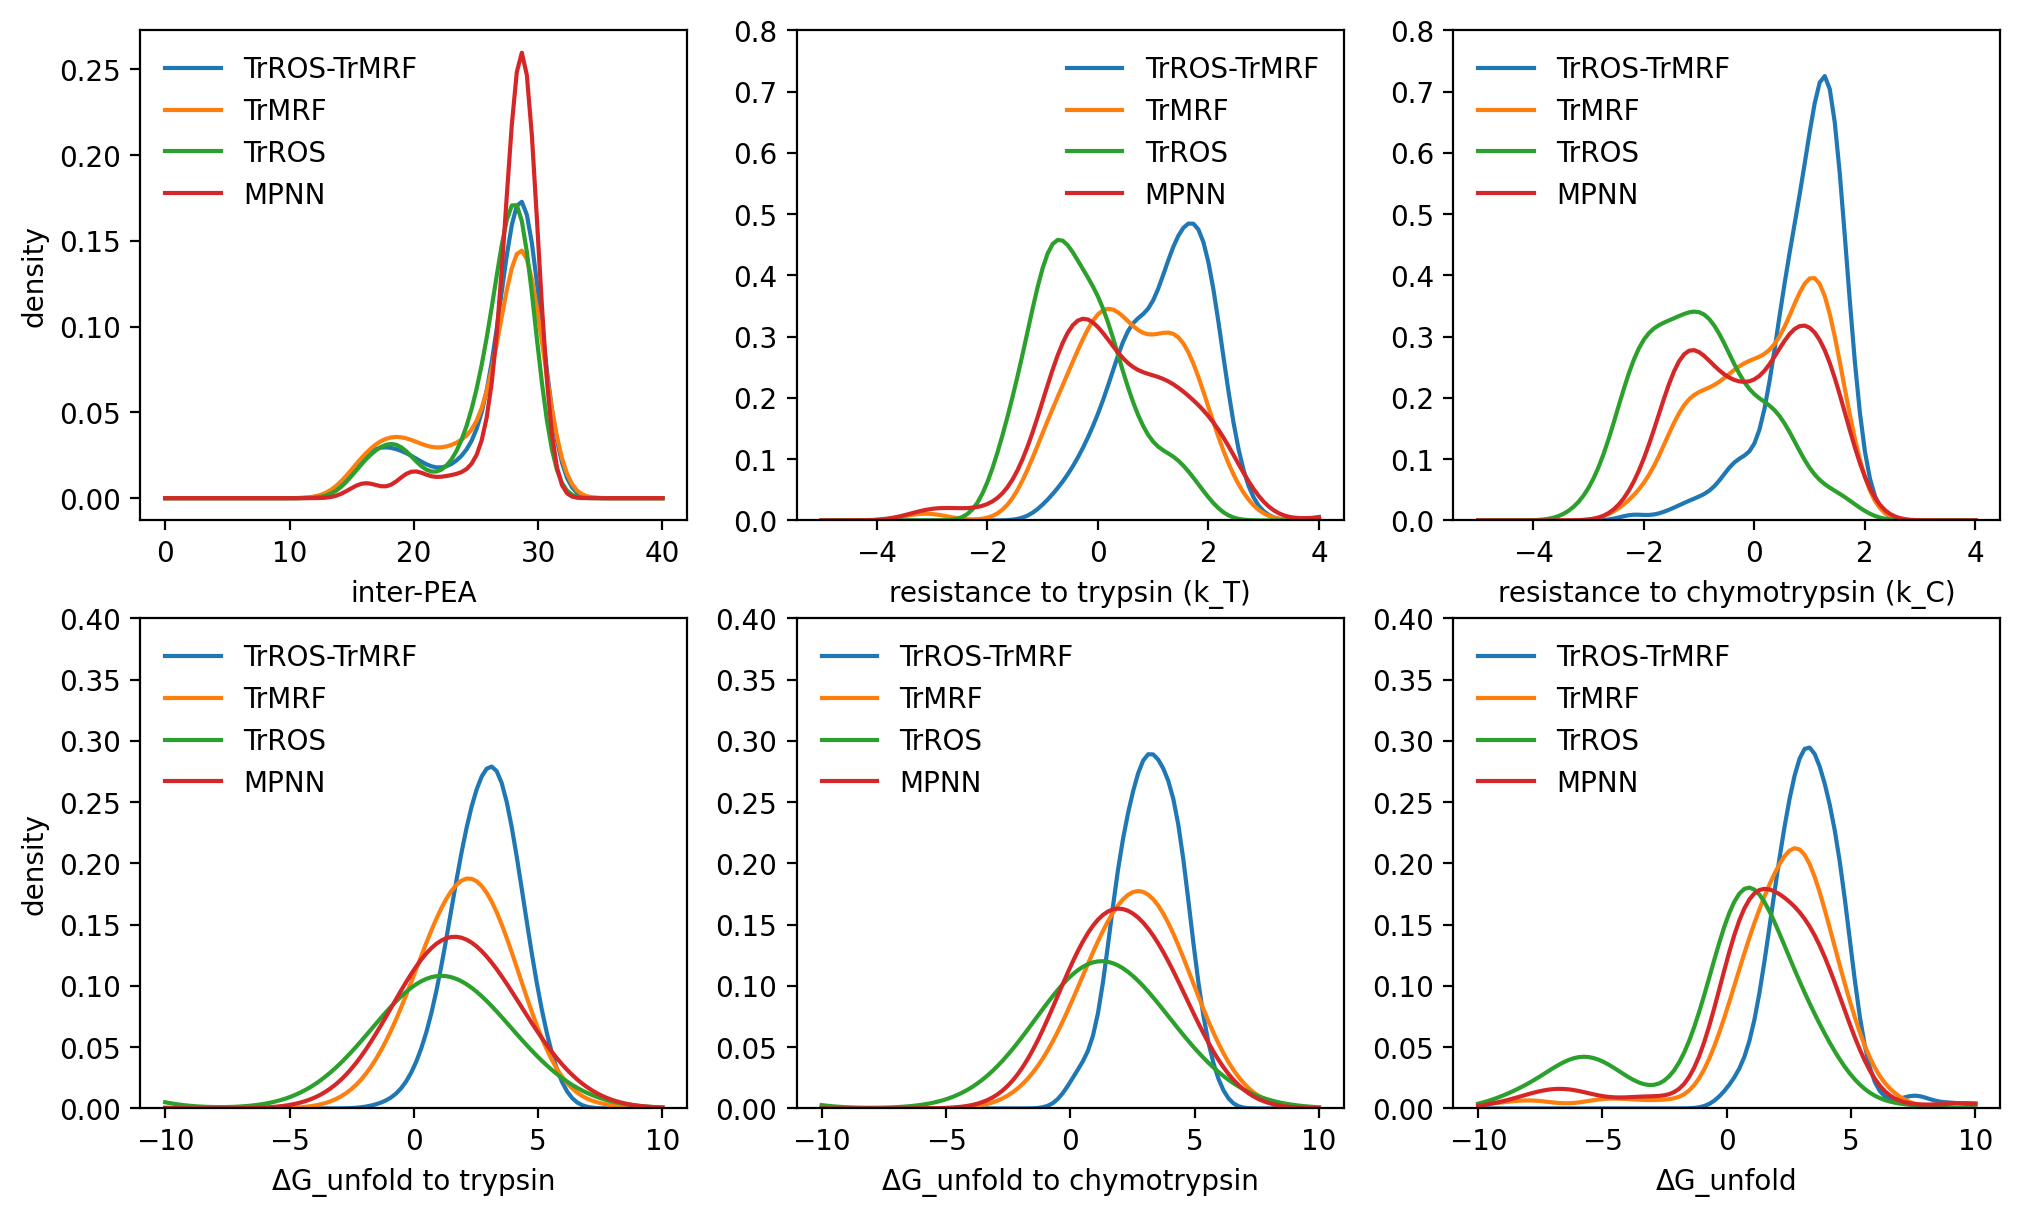

In [83]:

plt.figure(figsize=(12,7),dpi=200)
r = np.linspace(0,40,100)
plt.subplot(2,3,1)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:,-2])(r),label="TrROS-TrMRF")
plt.plot(r,stats.gaussian_kde(_TrMRF[:,-2])(r),label="TrMRF")
plt.plot(r,stats.gaussian_kde(_TrROS[:,-2])(r),label="TrROS")
plt.plot(r,stats.gaussian_kde(_MPNN[:,-2])(r),label="MPNN")
#plt.plot([20,20],[0,0.07],color="black")
plt.legend(frameon=False)
plt.xlabel("inter-PEA")
plt.ylabel("density")

plddt_cutoff = 70
inter_pae_cutoff = 15
r = np.linspace(-5,4,100)
plt.subplot(2,3,2)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:, 0])(r),label="TrROS-TrMRF")
plt.plot(r,stats.gaussian_kde(_TrMRF[:, 0])(r),label="TrMRF")
plt.plot(r,stats.gaussian_kde(_TrROS[:, 0])(r),label="TrROS")
plt.plot(r,stats.gaussian_kde(_MPNN[:, 0])(r),label="MPNN")
# plt.plot([-2,-2],[0,0.6],color="black")
plt.legend(frameon=False)
plt.xlabel("resistance to trypsin (k_T)")
# plt.ylabel("density")
plt.ylim(0,0.8)


plt.subplot(2,3,3)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:, 1])(r),label="TrROS-TrMRF")
plt.plot(r,stats.gaussian_kde(_TrMRF[:, 1])(r),label="TrMRF")
plt.plot(r,stats.gaussian_kde(_TrROS[:, 1])(r),label="TrROS")
plt.plot(r,stats.gaussian_kde(_MPNN[:, 1])(r),label="MPNN")
# plt.plot([-1,-1],[0,0.56],color="black")
plt.legend(frameon=False)
plt.xlabel("resistance to chymotrypsin (k_C)")
plt.ylim(0,0.8)

r = np.linspace(-10, 10, 100)


# Subplot 1
plt.subplot(2, 3, 4)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 2])(r), label="TrROS-TrMRF")
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 2])(r), label="TrMRF")
plt.plot(r, stats.gaussian_kde(_TrROS[:, 2])(r), label="TrROS")
plt.plot(r, stats.gaussian_kde(_MPNN[:, 2])(r), label="MPNN")
plt.legend(frameon=False)
plt.xlabel("ΔG_unfold to trypsin")
plt.ylabel("density")

plt.ylim(0, 0.4)

# Subplot 2
plt.subplot(2, 3, 5)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 3])(r), label="TrROS-TrMRF")
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 3])(r), label="TrMRF")
plt.plot(r, stats.gaussian_kde(_TrROS[:,3])(r), label="TrROS")
plt.plot(r, stats.gaussian_kde(_MPNN[:, 3])(r), label="MPNN")
plt.legend(frameon=False)
plt.xlabel("ΔG_unfold to chymotrypsin")
plt.ylim(0, 0.4)

# Subplot 3
plt.subplot(2, 3, 6)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 4])(r), label="TrROS-TrMRF")
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 4])(r), label="TrMRF")
plt.plot(r, stats.gaussian_kde(_TrROS[:,4])(r), label="TrROS")
plt.plot(r, stats.gaussian_kde(_MPNN[:, 4])(r), label="MPNN")
plt.legend(frameon=False)
plt.xlabel("ΔG_unfold")
plt.ylim(0, 0.4)



# plt.savefig('figures/4seqs_plddt07_interpae015/fileterd_plddt70_interpae15_k_and_G.png', dpi =300)
plt.show()

## 2. Filtered based on plddt and inter-PAE + TM score btw same ID > 0.7

In [41]:
import csv


methods = {"TrROS": {}, "TrMRF": {}, "TrROS_Hall": {}, "JUSTAS": {}}

with open("dataset_final/all_4_AF_plddt70_inter_pae_015_tm07.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Skip the header

    for row in reader:
        name, sequence, Full_PLDDT, half_masked_PLDDT, max_PLDDT, avg_PLDDT, esm_score, AF_plddt, inter_pae, k_T_1, k_T_95CI, k_C_1, k_C_95CI, deltaG_t, deltaG_t_95CI, deltaG_c, deltaG_c_95CI, deltaG, deltaG_95CI ,unconditional_CE, conditional_CE, Hybrid_composite_score= row 
        tmp = name.split("_")
        ID, method = "_".join(tmp[:2]), "_".join(tmp[2:])
        
        if method in methods:  # Check if the method exists in the dictionary

            methods[method][ID] = {
                "k_T": float(k_T_1),
                "k_C": float(k_C_1),
                "deltaG_t": float(deltaG_t),
                "deltaG_c": float(deltaG_c),
                "deltaG": float(deltaG),
                "plddt": float(AF_plddt),
                "inter_pae": float(inter_pae),
                "Hybrid_composite_score": float(Hybrid_composite_score),
                  
            }

In [42]:
shared = {}
for method in ["TrROS","TrMRF","TrROS_Hall","JUSTAS"]: #methods.keys():
  for ID in methods[method].keys():
    if ID in shared: shared[ID] += 1
    else: shared[ID] = 1

In [44]:
_TrROS_TrMRF = []
_TrMRF = []
_TrROS = []
_MPNN = []
_NAME = []
for ID,num in shared.items():
  # if ID == "r11_340":
  #   print("TrROS",methods["TrROS"][ID])
  #   print("TrMRF",methods["TrMRF"][ID])
  #   print("TrROS_TrMRF",methods["TrROS_Hall"][ID])
  #   print("JUSTAS", methods["JUSTAS"][ID])
  if num == 4:
    if methods["TrROS"][ID]["plddt"] > 70 \
    and methods["TrMRF"][ID]["plddt"] > 70 \
    and methods["TrROS_Hall"][ID]["plddt"] > 70 \
    and methods["JUSTAS"][ID]["plddt"] > 70 \
    \
    and methods["TrROS"][ID]["inter_pae"] > 15.0 \
    and methods["TrMRF"][ID]["inter_pae"] > 15.0 \
    and methods["TrROS_Hall"][ID]["inter_pae"] > 15.0 \
    and methods["JUSTAS"][ID]["inter_pae"] > 15.0:

      _TrROS_TrMRF.append([methods["TrROS_Hall"][ID]["k_T"],
                           methods["TrROS_Hall"][ID]["k_C"],
                           methods["TrROS_Hall"][ID]["deltaG_t"],
                           methods["TrROS_Hall"][ID]["deltaG_c"],
                           methods["TrROS_Hall"][ID]["deltaG"],
                           methods["TrROS_Hall"][ID]["Hybrid_composite_score"],
                           methods["TrROS_Hall"][ID]["inter_pae"],
                           methods["TrROS_Hall"][ID]["plddt"]])
      _TrMRF.append([methods["TrMRF"][ID]["k_T"],
                     methods["TrMRF"][ID]["k_C"],
                     methods["TrMRF"][ID]["deltaG_t"],
                     methods["TrMRF"][ID]["deltaG_c"],
                     methods["TrMRF"][ID]["deltaG"],
                     methods["TrMRF"][ID]["Hybrid_composite_score"],
                     methods["TrMRF"][ID]["inter_pae"],
                     methods["TrMRF"][ID]["plddt"]])
      _TrROS.append([methods["TrROS"][ID]["k_T"],
                     methods["TrROS"][ID]["k_C"],
                     methods["TrROS"][ID]["deltaG_t"],
                     methods["TrROS"][ID]["deltaG_c"],
                     methods["TrROS"][ID]["deltaG"],
                     methods["TrROS"][ID]["Hybrid_composite_score"],
                     methods["TrROS"][ID]["inter_pae"],
                     methods["TrROS"][ID]["plddt"]])
      _MPNN.append([methods["JUSTAS"][ID]["k_T"],
                     methods["JUSTAS"][ID]["k_C"],
                     methods["JUSTAS"][ID]["deltaG_t"],
                     methods["JUSTAS"][ID]["deltaG_c"],
                     methods["JUSTAS"][ID]["deltaG"],
                     methods["JUSTAS"][ID]["Hybrid_composite_score"],
                     methods["JUSTAS"][ID]["inter_pae"],
                     methods["JUSTAS"][ID]["plddt"]])
      _NAME.append(ID)


_TrROS_TrMRF = np.array(_TrROS_TrMRF)
_TrMRF = np.array(_TrMRF)
_TrROS = np.array(_TrROS)
_MPNN = np.array(_MPNN)

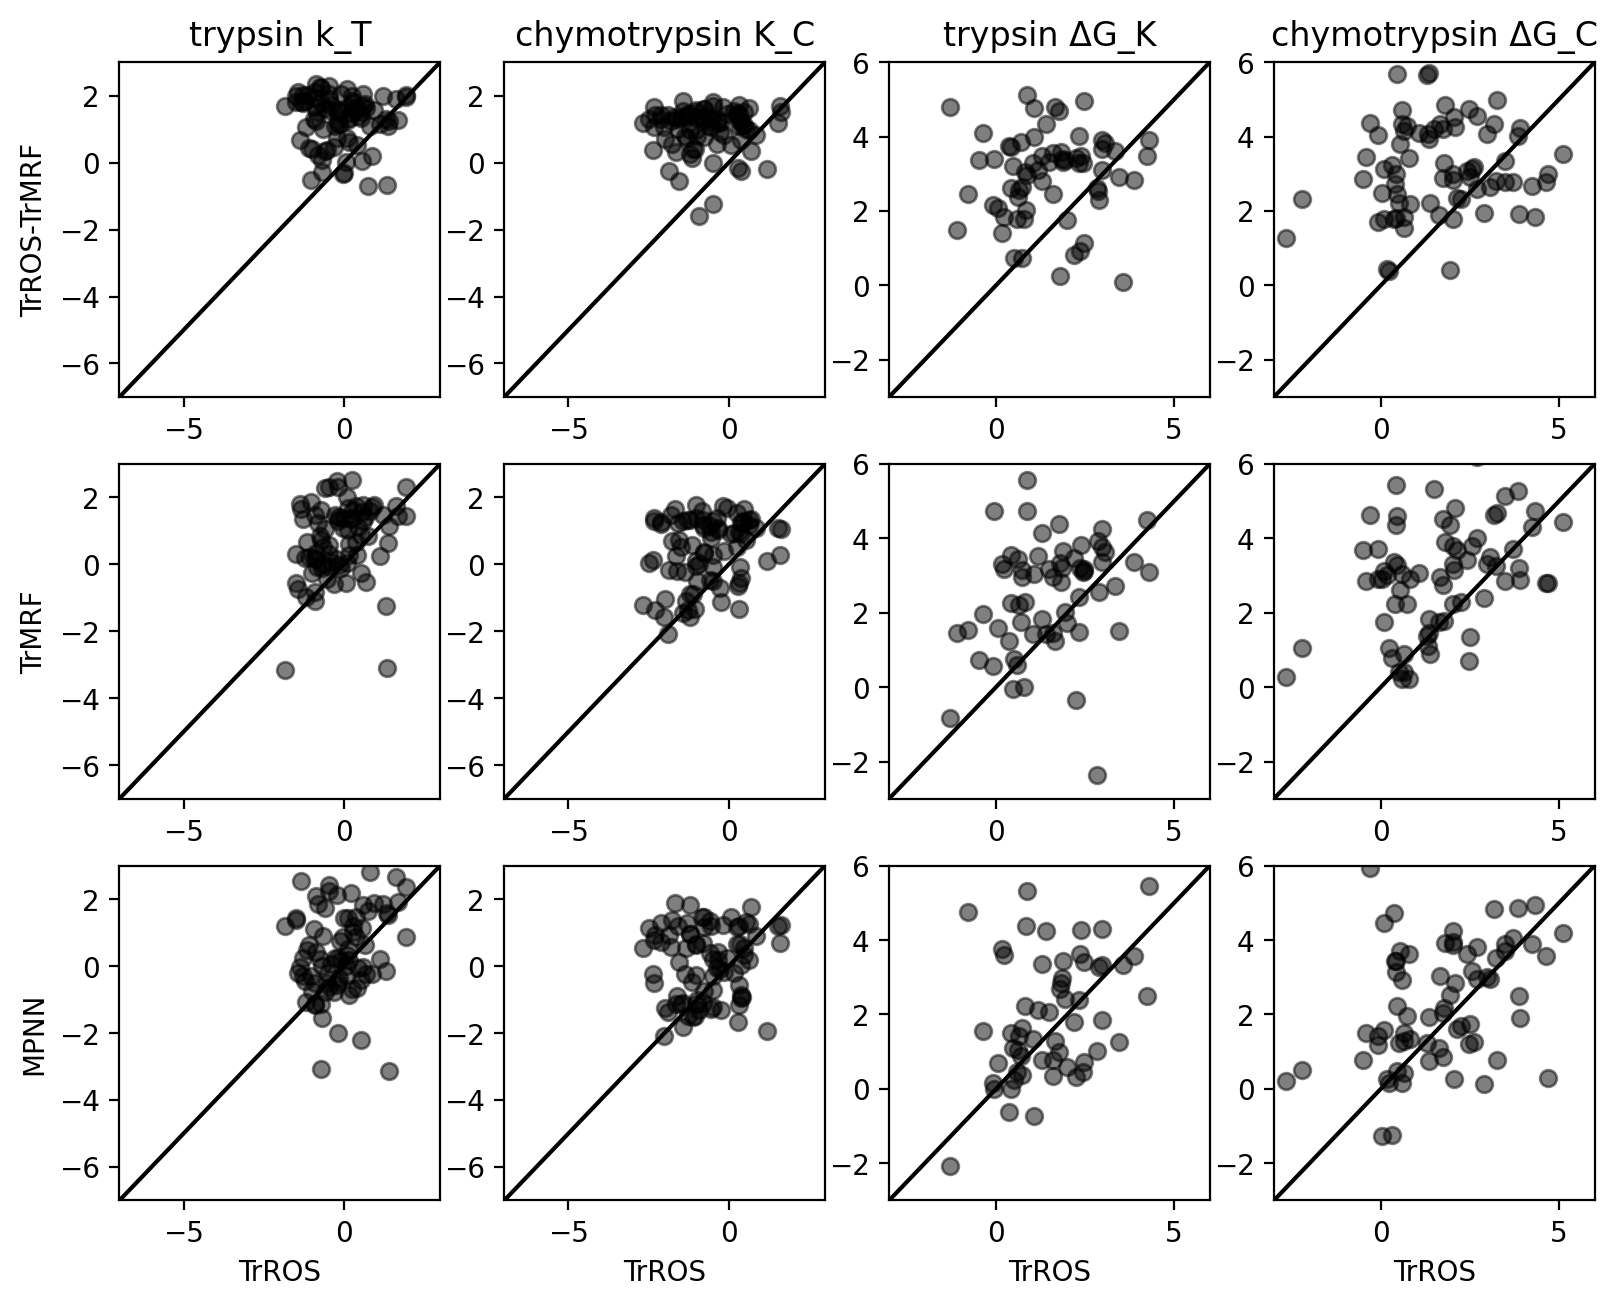

In [88]:
plt.figure(figsize=(12,10),dpi=200)

plt.subplot(4,5,1)
plt.title("trypsin k_T")
plt.scatter(_TrROS[:,0],_TrROS_TrMRF[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrROS-TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,2)
plt.title("chymotrypsin K_C")
plt.scatter(_TrROS[:,1],_TrROS_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,3)
plt.title("trypsin ΔG_K")
plt.scatter(_TrROS[:,2],_TrROS_TrMRF[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,4)
plt.title("chymotrypsin ΔG_C")
plt.scatter(_TrROS[:,3],_TrROS_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,5)
# plt.title("Hybrid \ncomposite_score")
# plt.scatter(_TrROS[:,7],_TrROS_TrMRF[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")


plt.subplot(4,5,6)
plt.scatter(_TrROS[:,0],_TrMRF[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,7)
plt.scatter(_TrROS[:,1],_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,8)
plt.scatter(_TrROS[:,2],_TrMRF[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,9)
plt.scatter(_TrROS[:,3],_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,10)
# plt.scatter(_TrROS[:,7],_TrMRF[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")


plt.subplot(4,5,11)
plt.scatter(_TrROS[:,0],_MPNN[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("TrROS");plt.ylabel("MPNN");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,12)
plt.scatter(_TrROS[:,1],_MPNN[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("TrROS");plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,13)
plt.scatter(_TrROS[:,2],_MPNN[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS");plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,14)
plt.scatter(_TrROS[:,3],_MPNN[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS");plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,15)
# plt.scatter(_TrROS[:,7],_MPNN[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.xlabel("TrROS");plt.plot([20,100],[20,100],color="black")


# plt.savefig('figures/4seqs_plddt07_interpae015_tm07/TM07_TRros_vs_others_experiment_evaluation.png', dpi=300)
plt.show()

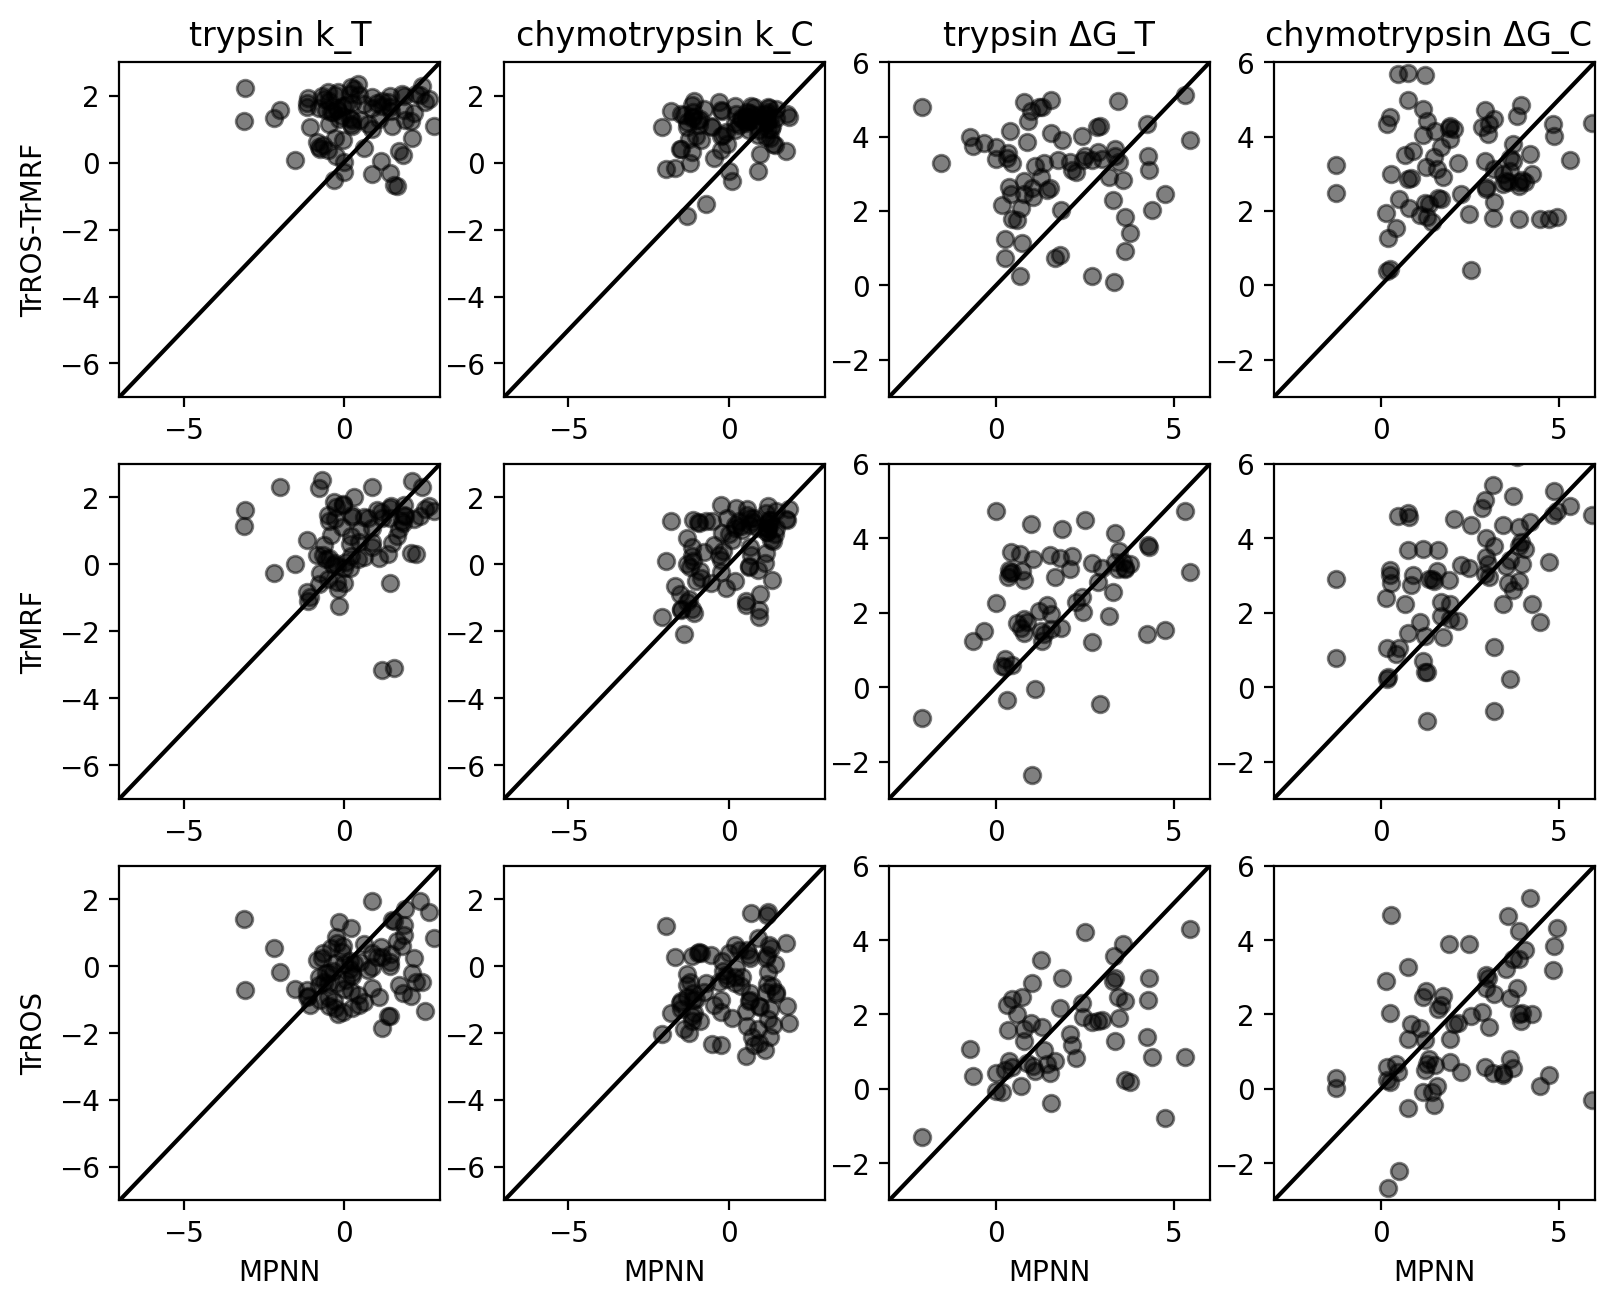

In [89]:
plt.figure(figsize=(12,10),dpi=200)

plt.subplot(4,5,1)
plt.title("trypsin k_T")
plt.scatter(_MPNN[:,0],_TrROS_TrMRF[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrROS-TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,2)
plt.title("chymotrypsin k_C")
plt.scatter(_MPNN[:,1],_TrROS_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,3)
plt.title("trypsin ΔG_T")
plt.scatter(_MPNN[:,2],_TrROS_TrMRF[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,4)
plt.title("chymotrypsin ΔG_C ")
plt.scatter(_MPNN[:,3],_TrROS_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,5)
# plt.title("Hybrid \ncomposite_score")
# plt.scatter(_MPNN[:,7],_TrROS_TrMRF[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")

plt.subplot(4,5,6)
plt.scatter(_MPNN[:,0],_TrMRF[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,7)
plt.scatter(_MPNN[:,1],_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,8)
plt.scatter(_MPNN[:,2],_TrMRF[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,9)
plt.scatter(_MPNN[:,3],_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,10)
# plt.scatter(_MPNN[:,7],_TrMRF[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")

plt.subplot(4,5,11)
plt.scatter(_MPNN[:,0],_TrROS[:,0], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("MPNN");plt.ylabel("TrROS");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,5,12)
plt.scatter(_MPNN[:,1],_TrROS[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("MPNN");plt.plot([-7,3],[-7,3],color="black")

plt.subplot(4,5,13)
plt.scatter(_MPNN[:,2],_TrROS[:,2], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("MPNN");plt.plot([-3,6],[-3,6],color="black")
plt.subplot(4,5,14)
plt.scatter(_MPNN[:,3],_TrROS[:,3], color="black", alpha=0.5)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("MPNN");plt.plot([-3,6],[-3,6],color="black")
# plt.subplot(4,5,15)
# plt.scatter(_MPNN[:,7],_TrROS[:,7], color="black", alpha=0.5)
# plt.xlim(20,100);plt.ylim(20, 100);plt.plot([20,100],[20,100],color="black")

# plt.savefig('figures/4seqs_plddt07_interpae015_tm07/TM07_MPNN_vs_others_experiment_evaluation.png',dpi=300)

plt.show()

/state/partition1/slurm_tmp/24756012.0.0/ipykernel_4040819/3148183634.py:81: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('figures/4seqs_plddt07_interpae015_tm07/TM07_joint_model_vs_others_experiment_evaluation.png',dpi=300)


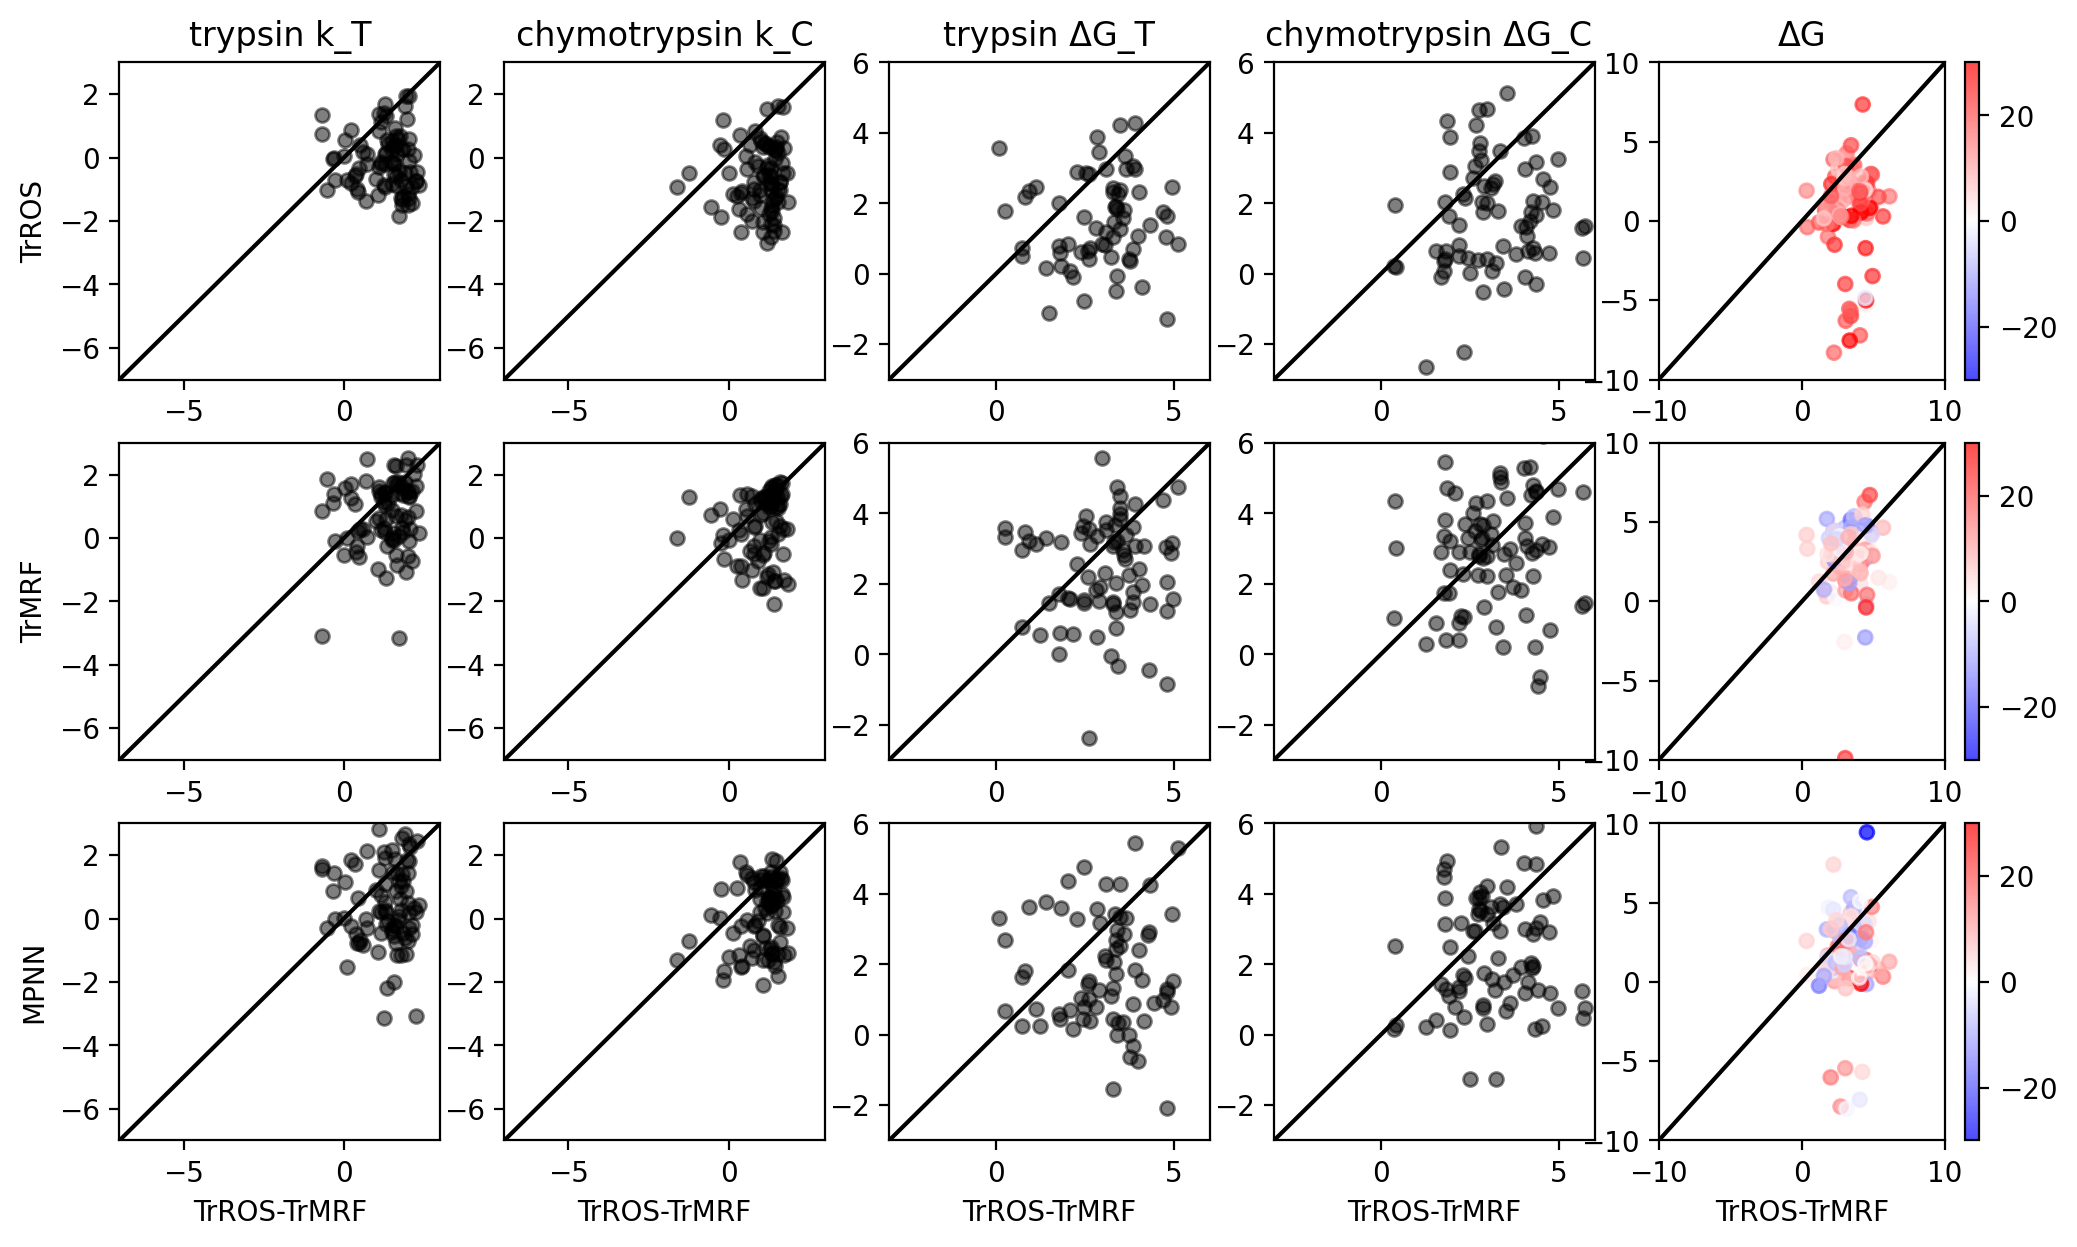

In [62]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 5, figsize=(12, 7), dpi=200, constrained_layout={'w_pad': 2, 'h_pad': 2})

plt.subplot(3,5,1)
plt.title("trypsin k_T")
plt.scatter(_TrROS_TrMRF[:,0],_TrROS[:,0], color="black", alpha=0.5, s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrROS");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,2)
plt.title("chymotrypsin k_C")
plt.scatter(_TrROS_TrMRF[:,1],_TrROS[:,1], color="black", alpha=0.5, s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,3)
plt.title("trypsin ΔG_T")
plt.scatter(_TrROS_TrMRF[:,2],_TrROS[:,2], color="black", alpha=0.5, s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,5,4)
plt.title("chymotrypsin ΔG_C ")
plt.scatter(_TrROS_TrMRF[:,3],_TrROS[:,3], color="black", alpha=0.5, s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
last_subplot = plt.subplot(3,5,5)
plt.title("ΔG")
divider = make_axes_locatable(last_subplot)
cax = divider.append_axes("right", size="5%", pad=0.1)
scatter = last_subplot.scatter(_TrROS_TrMRF[:, 4], _TrROS[:, 4], c=_TrROS_TrMRF[:, 5] - _TrROS[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
last_subplot.set_xlim(-10, 10)
last_subplot.set_ylim(-10, 10)
last_subplot.plot([-10, 10], [-10, 10], color="black")
cbar = plt.colorbar(scatter, cax=cax)


plt.subplot(3,5,6)
plt.scatter(_TrROS_TrMRF[:,0],_TrMRF[:,0], color="black", alpha=0.5, s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.ylabel("TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,7)
plt.scatter(_TrROS_TrMRF[:,1],_TrMRF[:,1], color="black", alpha=0.5,s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

plt.subplot(3,5,8)
plt.scatter(_TrROS_TrMRF[:,2],_TrMRF[:,2], color="black", alpha=0.5,s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,5,9)
plt.scatter(_TrROS_TrMRF[:,3],_TrMRF[:,3], color="black", alpha=0.5,s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.plot([-3,6],[-3,6],color="black")
last_subplot = plt.subplot(3,5,10)
divider = make_axes_locatable(last_subplot)
cax = divider.append_axes("right", size="5%", pad=0.1)
scatter= last_subplot.scatter(_TrROS_TrMRF[:, 4], _TrMRF[:, 4], c=_TrROS_TrMRF[:, 5] - _TrMRF[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
last_subplot.set_xlim(-10, 10)
last_subplot.set_ylim(-10, 10)
last_subplot.plot([-10, 10], [-10, 10], color="black")
cbar = plt.colorbar(scatter, cax=cax)


plt.subplot(3,5,11)
plt.scatter(_TrROS_TrMRF[:,0],_MPNN[:,0], color="black", alpha=0.5 ,s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("TrROS-TrMRF");plt.ylabel("MPNN");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,12)
plt.scatter(_TrROS_TrMRF[:,1],_MPNN[:,1], color="black", alpha=0.5, s=25)
plt.xlim(-7,3);plt.ylim(-7,3);plt.xlabel("TrROS-TrMRF");plt.plot([-7,3],[-7,3],color="black")
plt.subplot(3,5,13)
plt.scatter(_TrROS_TrMRF[:,2],_MPNN[:,2], color="black", alpha=0.5 , s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS-TrMRF");plt.plot([-3,6],[-3,6],color="black")
plt.subplot(3,5,14)
plt.scatter(_TrROS_TrMRF[:,3],_MPNN[:,3], color="black", alpha=0.5 , s=25)
plt.xlim(-3,6);plt.ylim(-3, 6);plt.xlabel("TrROS-TrMRF");plt.plot([-3,6],[-3,6],color="black")

last_subplot = plt.subplot(3, 5, 15)
divider = make_axes_locatable(last_subplot)
cax = divider.append_axes("right", size="5%", pad=0.1)
scatter = last_subplot.scatter(_TrROS_TrMRF[:, 4], _MPNN[:, 4], c=_TrROS_TrMRF[:, 5] - _MPNN[:, 5], cmap='bwr', alpha=0.7, vmin=-30, vmax=30, s=25)
last_subplot.set_xlim(-10, 10)
last_subplot.set_ylim(-10, 10)
last_subplot.plot([-10, 10], [-10, 10], color="black")
last_subplot.set_xlabel("TrROS-TrMRF")
cbar = plt.colorbar(scatter, cax=cax)



# plt.savefig('figures/4seqs_plddt07_interpae015_tm07/TM07_joint_model_vs_others_experiment_evaluation.png',dpi=300)

plt.show()

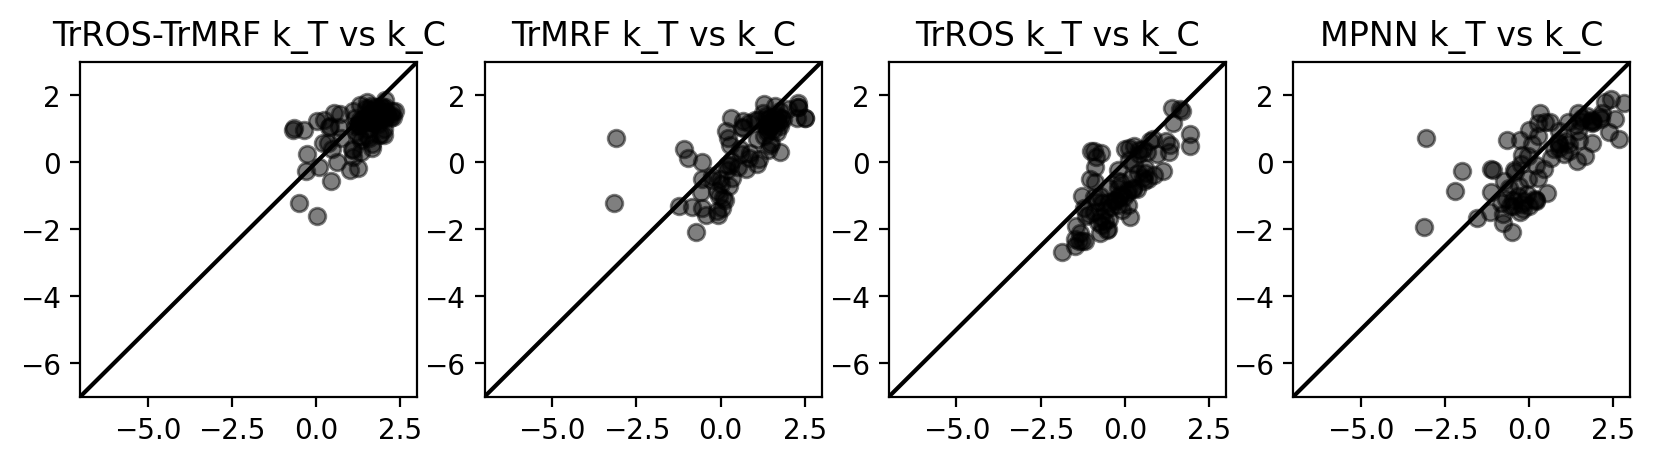

In [91]:
plt.figure(figsize=(10,10),dpi=200)

plt.subplot(4,4,1)
plt.title("TrROS-TrMRF k_T vs k_C")
plt.scatter(_TrROS_TrMRF[:,0],_TrROS_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,4,2)
plt.title("TrMRF k_T vs k_C")
plt.scatter(_TrMRF[:,0],_TrMRF[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,4,3)
plt.title("TrROS k_T vs k_C")
plt.scatter(_TrROS[:,0],_TrROS[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")
plt.subplot(4,4,4)
plt.title("MPNN k_T vs k_C")
plt.scatter(_MPNN[:,0],_MPNN[:,1], color="black", alpha=0.5)
plt.xlim(-7,3);plt.ylim(-7,3);plt.plot([-7,3],[-7,3],color="black")

# plt.savefig('figures/4seqs_plddt07_interpae015_tm07/TM07_kc_vs_kt_evaluation.png', dpi=300)

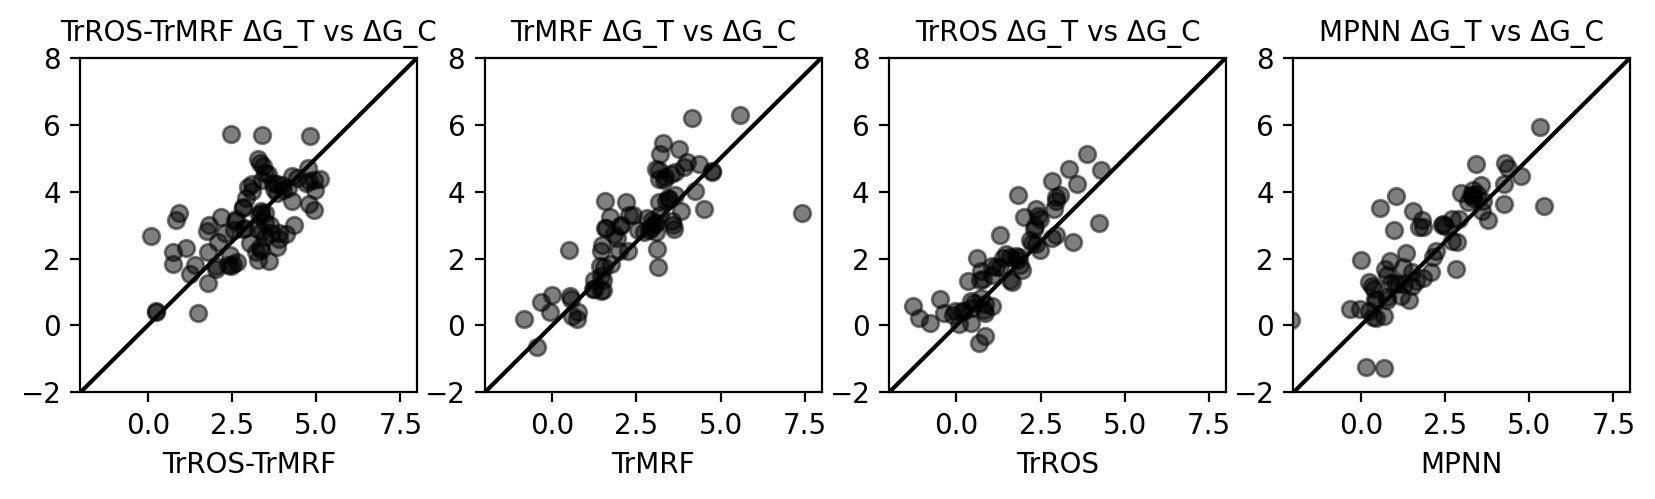

In [93]:
plt.figure(figsize=(10,10),dpi=200)

plt.subplot(4,4,1)
plt.title("TrROS-TrMRF ΔG_T vs ΔG_C", fontsize = 10)
plt.scatter(_TrROS_TrMRF[:,2],_TrROS_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("TrROS-TrMRF");plt.plot([-2,8],[-2,8],color="black")
plt.subplot(4,4,2)
plt.title("TrMRF ΔG_T vs ΔG_C", fontsize = 10)
plt.scatter(_TrMRF[:,2],_TrMRF[:,3], color="black", alpha=0.5)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("TrMRF");plt.plot([-2,8],[-2,8],color="black")
plt.subplot(4,4,3)
plt.title("TrROS ΔG_T vs ΔG_C", fontsize = 10)
plt.scatter(_TrROS[:,2],_TrROS[:,3], color="black", alpha=0.5)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("TrROS");plt.plot([-2,8],[-2,8],color="black")
plt.subplot(4,4,4)
plt.title("MPNN ΔG_T vs ΔG_C", fontsize = 10)
plt.scatter(_MPNN[:,2],_MPNN[:,3], color="black", alpha=0.5)
plt.xlim(-2,8);plt.ylim(-2,8);plt.xlabel("MPNN");plt.plot([-2,8],[-2,8],color="black")

# plt.savefig('figures/4seqs_plddt07_interpae015_tm07/TM07_Gc_vs_Gt_evaluation.png',dpi=300)

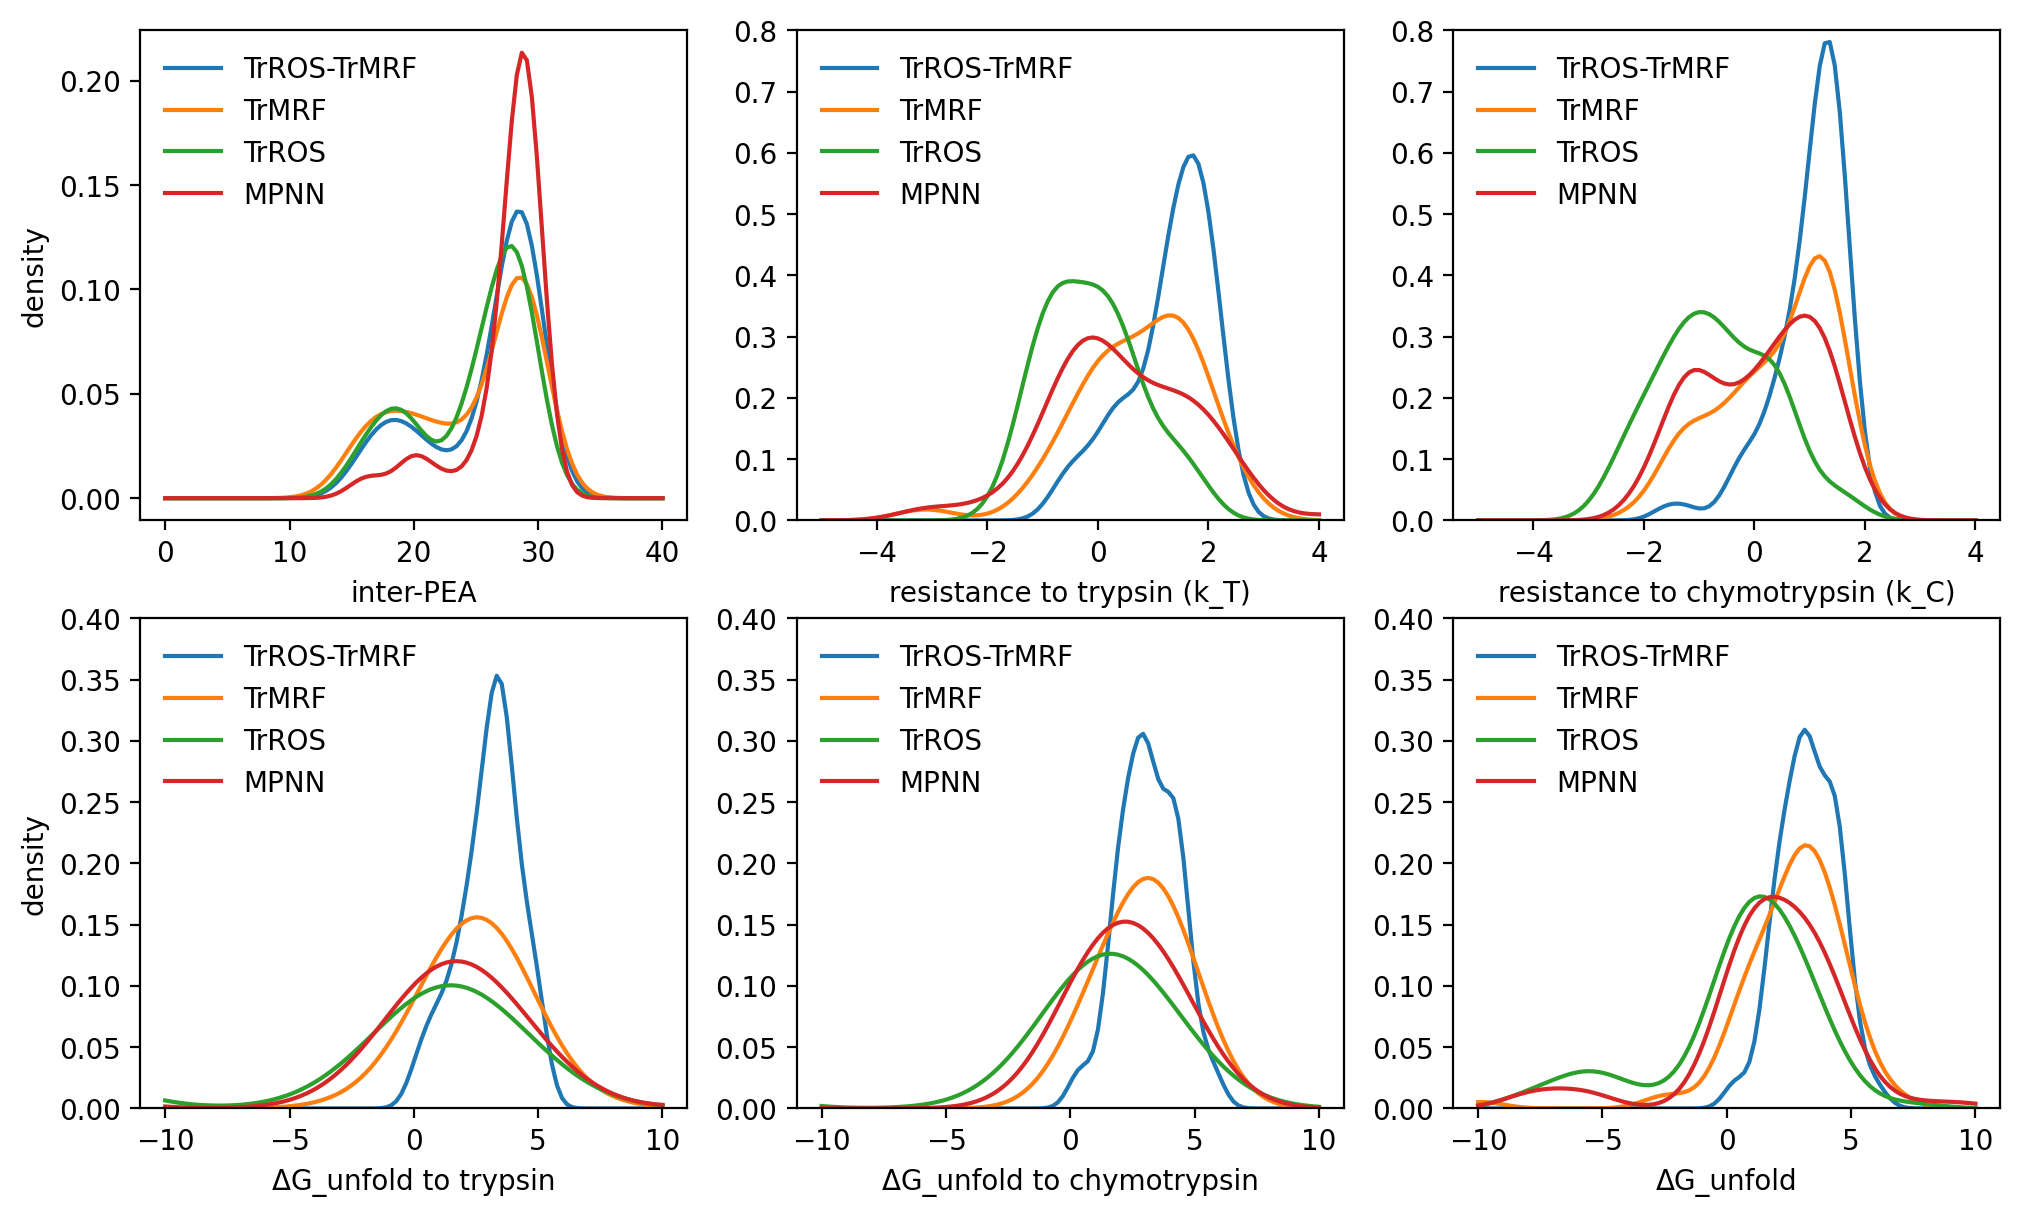

In [94]:

plt.figure(figsize=(12,7),dpi=200)
r = np.linspace(0,40,100)
plt.subplot(2,3,1)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:,-2])(r),label="TrROS-TrMRF")
plt.plot(r,stats.gaussian_kde(_TrMRF[:,-2])(r),label="TrMRF")
plt.plot(r,stats.gaussian_kde(_TrROS[:,-2])(r),label="TrROS")
plt.plot(r,stats.gaussian_kde(_MPNN[:,-2])(r),label="MPNN")
#plt.plot([20,20],[0,0.07],color="black")
plt.legend(frameon=False)
plt.xlabel("inter-PEA")
plt.ylabel("density")

plddt_cutoff = 70
inter_pae_cutoff = 15
r = np.linspace(-5,4,100)
plt.subplot(2,3,2)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:, 0])(r),label="TrROS-TrMRF")
plt.plot(r,stats.gaussian_kde(_TrMRF[:, 0])(r),label="TrMRF")
plt.plot(r,stats.gaussian_kde(_TrROS[:, 0])(r),label="TrROS")
plt.plot(r,stats.gaussian_kde(_MPNN[:, 0])(r),label="MPNN")
# plt.plot([-2,-2],[0,0.6],color="black")
plt.legend(frameon=False)
plt.xlabel("resistance to trypsin (k_T)")
# plt.ylabel("density")
plt.ylim(0,0.8)


plt.subplot(2,3,3)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:, 1])(r),label="TrROS-TrMRF")
plt.plot(r,stats.gaussian_kde(_TrMRF[:, 1])(r),label="TrMRF")
plt.plot(r,stats.gaussian_kde(_TrROS[:, 1])(r),label="TrROS")
plt.plot(r,stats.gaussian_kde(_MPNN[:, 1])(r),label="MPNN")
# plt.plot([-1,-1],[0,0.56],color="black")
plt.legend(frameon=False)
plt.xlabel("resistance to chymotrypsin (k_C)")
plt.ylim(0,0.8)

r = np.linspace(-10, 10, 100)


# Subplot 1
plt.subplot(2, 3, 4)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 2])(r), label="TrROS-TrMRF")
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 2])(r), label="TrMRF")
plt.plot(r, stats.gaussian_kde(_TrROS[:, 2])(r), label="TrROS")
plt.plot(r, stats.gaussian_kde(_MPNN[:, 2])(r), label="MPNN")
plt.legend(frameon=False)
plt.xlabel("ΔG_unfold to trypsin")
plt.ylabel("density")

plt.ylim(0, 0.4)

# Subplot 2
plt.subplot(2, 3, 5)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 3])(r), label="TrROS-TrMRF")
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 3])(r), label="TrMRF")
plt.plot(r, stats.gaussian_kde(_TrROS[:,3])(r), label="TrROS")
plt.plot(r, stats.gaussian_kde(_MPNN[:, 3])(r), label="MPNN")
plt.legend(frameon=False)
plt.xlabel("ΔG_unfold to chymotrypsin")
plt.ylim(0, 0.4)

# Subplot 3
plt.subplot(2, 3, 6)
plt.plot(r, stats.gaussian_kde(_TrROS_TrMRF[:, 4])(r), label="TrROS-TrMRF")
plt.plot(r, stats.gaussian_kde(_TrMRF[:, 4])(r), label="TrMRF")
plt.plot(r, stats.gaussian_kde(_TrROS[:,4])(r), label="TrROS")
plt.plot(r, stats.gaussian_kde(_MPNN[:, 4])(r), label="MPNN")
plt.legend(frameon=False)
plt.xlabel("ΔG_unfold")
plt.ylim(0, 0.4)



# plt.savefig('figures/4seqs_plddt07_interpae015_tm07/TM07_fileterd_plddt70_interpae15_k_and_G.png',dpi=300)
plt.show()

## 3. appendix

In [20]:
diff_TrROS_TrMRF = []
diff_TrROS_TrROS_MRF = []
diff_TrROS_JUSTAS = []
for ID,num in shared.items():
  if num == 3:
    diff_TrROS_TrMRF.append([methods["TrROS"][ID]["k_T"]-methods["TrMRF"][ID]["k_T"],
                           methods["TrROS"][ID]["k_C"]-methods["TrMRF"][ID]["k_C"]])
    diff_TrROS_TrROS_MRF.append([methods["TrROS"][ID]["k_T"]-methods["TrROS_Hall"][ID]["k_T"],
                               methods["TrROS"][ID]["k_C"]-methods["TrROS_Hall"][ID]["k_C"]])
    # diff_TrROS_JUSTAS.append([methods["TrROS"][ID]["k_T"]-methods["JUSTAS"][ID]["k_T"],
    #                        methods["TrROS"][ID]["k_C"]-methods["JUSTAS"][ID]["k_C"]])

KeyError: 'r1_364'

Text(0, 0.5, 'density')

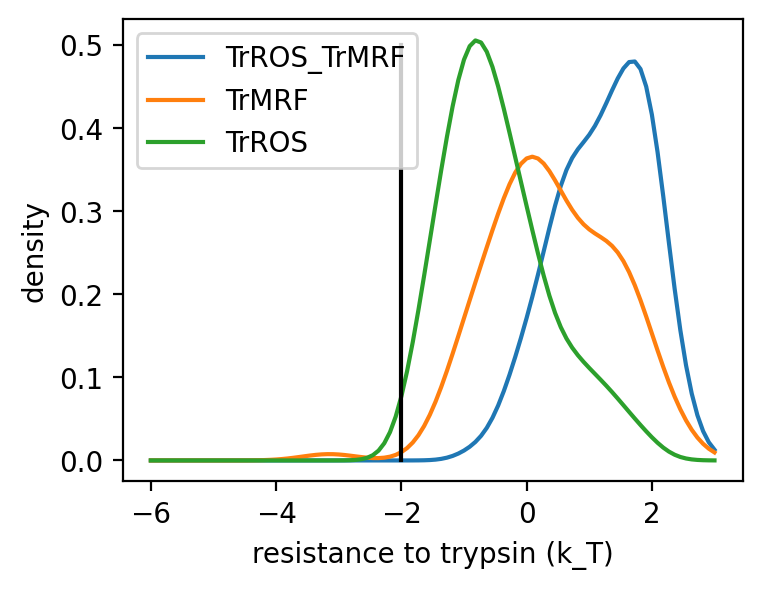

In [95]:
r = np.linspace(-6,3,100)
bins = 50
plt.figure(figsize=(4,3),dpi=200)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:,0])(r),label="TrROS_TrMRF")
plt.plot(r,stats.gaussian_kde(_TrMRF[:,0])(r),label="TrMRF")
plt.plot(r,stats.gaussian_kde(_TrROS[:,0])(r),label="TrROS")
plt.plot([-2,-2],[0,0.5],color="black")
plt.legend()
plt.xlabel("resistance to trypsin (k_T)")
plt.ylabel("density")


Text(0, 0.5, 'density')

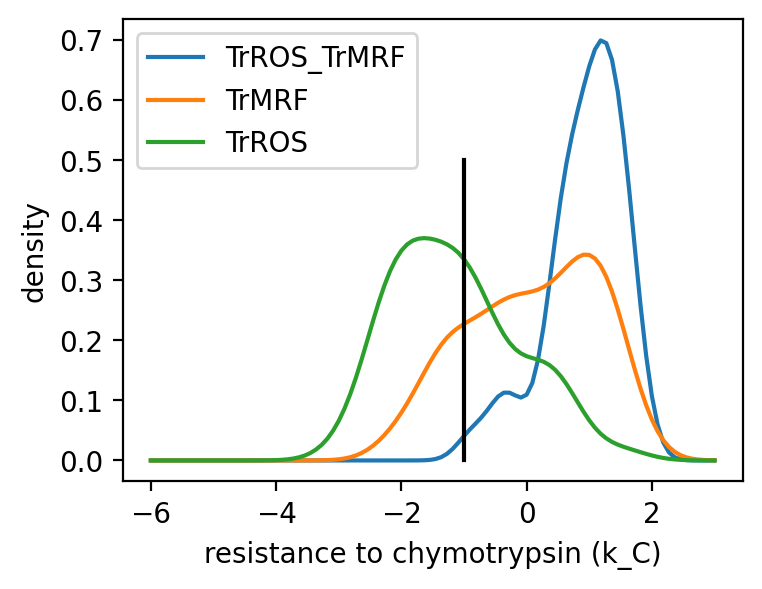

In [37]:
r = np.linspace(-6,3,100)
plt.figure(figsize=(4,3),dpi=200)
plt.plot(r,stats.gaussian_kde(_TrROS_TrMRF[:,1])(r),label="TrROS_TrMRF")
plt.plot(r,stats.gaussian_kde(_TrMRF[:,1])(r),label="TrMRF")
plt.plot(r,stats.gaussian_kde(_TrROS[:,1])(r),label="TrROS")
plt.plot([-1,-1],[0,0.5],color="black")
plt.legend()
plt.xlabel("resistance to chymotrypsin (k_C)")
plt.ylabel("density")


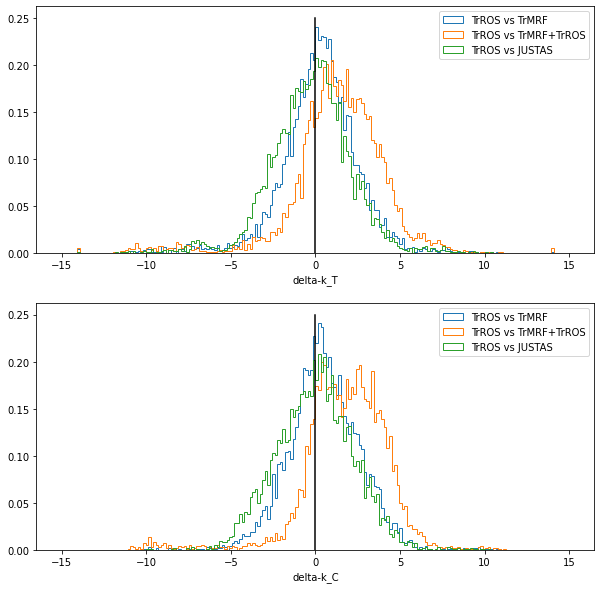

In [ ]:
bins = 200
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
n, x1t, _ = plt.hist(-np.array(diff_TrROS_TrMRF)[:,0],bins=bins,range=(-15,15),
                    histtype="step",density=True,label="TrROS vs TrMRF");
n, x2t, _ = plt.hist(-np.array(diff_TrROS_TrROS_MRF)[:,0],bins=bins,range=(-15,15),
                    histtype="step",density=True,label="TrROS vs TrMRF+TrROS");
n, x3t, _ = plt.hist(-np.array(diff_TrROS_JUSTAS)[:,0],bins=bins,range=(-15,15),
                    histtype="step",density=True,label="TrROS vs JUSTAS");
plt.plot([0,0],[0,0.25],color="black")
plt.legend()
plt.xlabel("delta-k_T")
plt.subplot(2,1,2)
n, x1c, _ = plt.hist(-np.array(diff_TrROS_TrMRF)[:,1],bins=bins,range=(-15,15),
                    histtype="step",density=True,label="TrROS vs TrMRF");
n, x2c, _ = plt.hist(-np.array(diff_TrROS_TrROS_MRF)[:,1],bins=bins,range=(-15,15),
                    histtype="step",density=True,label="TrROS vs TrMRF+TrROS");
n, x3c, _ = plt.hist(-np.array(diff_TrROS_JUSTAS)[:,1],bins=bins,range=(-15,15),
                    histtype="step",density=True,label="TrROS vs JUSTAS");
plt.plot([0,0],[0,0.25],color="black")
plt.legend()
plt.xlabel("delta-k_C")
plt.show();

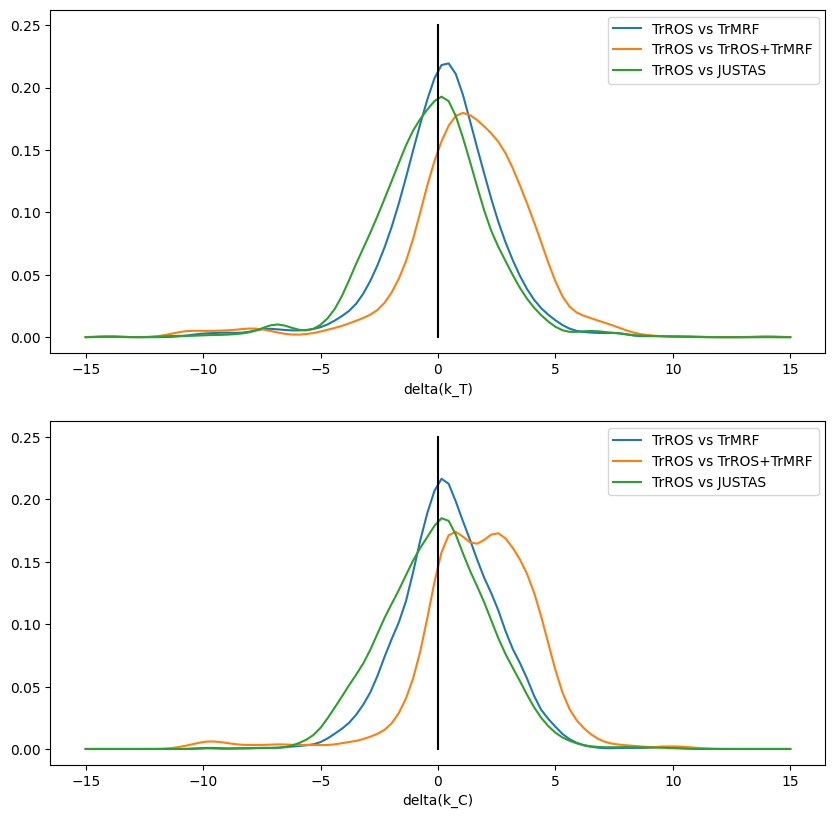

In [ ]:
r = np.linspace(-15,15,100)
bins = 200
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,1,1)
plt.plot(r,stats.gaussian_kde(-np.array(diff_TrROS_TrMRF)[:,0])(r),label="TrROS vs TrMRF")
plt.plot(r,stats.gaussian_kde(-np.array(diff_TrROS_TrROS_MRF)[:,0])(r),label="TrROS vs TrROS+TrMRF")
plt.plot(r,stats.gaussian_kde(-np.array(diff_TrROS_JUSTAS)[:,0])(r),label="TrROS vs JUSTAS")
plt.plot([0,0],[0,0.25],color="black")
plt.legend()
plt.xlabel("delta(k_T)")
plt.subplot(2,1,2)
plt.plot(r,stats.gaussian_kde(-np.array(diff_TrROS_TrMRF)[:,1])(r),label="TrROS vs TrMRF")
plt.plot(r,stats.gaussian_kde(-np.array(diff_TrROS_TrROS_MRF)[:,1])(r),label="TrROS vs TrROS+TrMRF")
plt.plot(r,stats.gaussian_kde(-np.array(diff_TrROS_JUSTAS)[:,1])(r),label="TrROS vs JUSTAS")
plt.plot([0,0],[0,0.25],color="black")
plt.legend()
plt.xlabel("delta(k_C)")
plt.show();

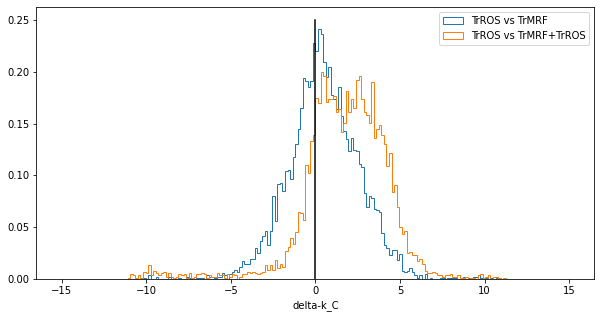

In [ ]:
bins = 200
plt.figure(figsize=(10,5))
n, x1, _ = plt.hist(-np.array(diff_TrROS_TrMRF)[:,1],bins=bins,range=(-15,15),
                    histtype="step",density=True,label="TrROS vs TrMRF");
n, x2, _ = plt.hist(-np.array(diff_TrROS_TrROS_MRF)[:,1],bins=bins,range=(-15,15),
                    histtype="step",density=True,label="TrROS vs TrMRF+TrROS");
#n, x3, _ = plt.hist(-np.array(diff_TrROS_JUSTAS)[:,1],bins=bins,range=(-15,15),
#                    histtype="step",density=True,label="TrROS vs JUSTAS");
plt.plot([0,0],[0,0.25],color="black")
plt.legend()
plt.xlabel("delta-k_C")
plt.show();

In [ ]:
x1

array([-15.  , -14.85, -14.7 , -14.55, -14.4 , -14.25, -14.1 , -13.95,
       -13.8 , -13.65, -13.5 , -13.35, -13.2 , -13.05, -12.9 , -12.75,
       -12.6 , -12.45, -12.3 , -12.15, -12.  , -11.85, -11.7 , -11.55,
       -11.4 , -11.25, -11.1 , -10.95, -10.8 , -10.65, -10.5 , -10.35,
       -10.2 , -10.05,  -9.9 ,  -9.75,  -9.6 ,  -9.45,  -9.3 ,  -9.15,
        -9.  ,  -8.85,  -8.7 ,  -8.55,  -8.4 ,  -8.25,  -8.1 ,  -7.95,
        -7.8 ,  -7.65,  -7.5 ,  -7.35,  -7.2 ,  -7.05,  -6.9 ,  -6.75,
        -6.6 ,  -6.45,  -6.3 ,  -6.15,  -6.  ,  -5.85,  -5.7 ,  -5.55,
        -5.4 ,  -5.25,  -5.1 ,  -4.95,  -4.8 ,  -4.65,  -4.5 ,  -4.35,
        -4.2 ,  -4.05,  -3.9 ,  -3.75,  -3.6 ,  -3.45,  -3.3 ,  -3.15,
        -3.  ,  -2.85,  -2.7 ,  -2.55,  -2.4 ,  -2.25,  -2.1 ,  -1.95,
        -1.8 ,  -1.65,  -1.5 ,  -1.35,  -1.2 ,  -1.05,  -0.9 ,  -0.75,
        -0.6 ,  -0.45,  -0.3 ,  -0.15,   0.  ,   0.15,   0.3 ,   0.45,
         0.6 ,   0.75,   0.9 ,   1.05,   1.2 ,   1.35,   1.5 ,   1.65,
      